# Analysis of Bank Marketing: CS675 Intro to Data Science Project #2

Andrew Napurano - AN47692N

# Executive Summary & Model Results

The goal of this project was to leverage several classification machine learning models to predict term deposit subscriptions for a Portuguese banking institution.

The following steps were taken to prepare the data for machine learning:

1.  Data cleaning and preparation
2.  SQL Integration for automated batch runs once new data is available
3.  Exploratory data analysis on most important features
4.  Inferential Statistics like the Chi-Squared and two-sample T-Tests ran to detemrine feature separation
5.  Feature scaling and splits to the training and testing dataset
6.  Classification Reports, Confusion Matricies, and ROC curves leveraged to interpret model results
7.  Hyperparameter tunning utilizing Randomized CV for cross validation and optimization
    SMOTE(Synthetic Minority Oversampling Technique) to help simulate models with more training data on prediciton class given     the imbalanced dataset

The dataset contains information about various marketing campaigns to the banks Clients and attributes of them such as job category, marital status, educational background, credit default, yearly bank balance, ways of contact, date and time last contacted, days since last contact, success of last marketing campaign, and ultimetly whether or not they subscribed to a term deposit.

<b>Exploratory Data Analysis Key Results

1.  41,188 total Clients in population with only 11.3% or 4,640 subscribing with deposits
2.  Clients in an Admin job role had a high probability to subscribe at 1,352 ( or 13% of all admins) and 29% of all Clients 
3.  2,532 or 54% of our subscribed Clients were married. (10% chance if you are married to subscribe)
4.  University Graduates make up 36% of our subscribed Clients (10% chance if you hold a university degree to subscribe)
5.  2,507 or 54% of our subscribe Clients own homes (10% chance if you own a home to subscribe)
6.  3,850 or 83% of our subscribed Clients do not have loans (11.3% of all Clients with loans)
7.  3,853 or 83% of our subscribed Clients were contacted via Cellphone (14% of all cellular contacts)
8.  Late Spring/Peak summer months May - August have the highest probability of subscriptions 2,749 or 59% of subscriptions
9.  Thursdays have the highest subscriber count 1,049 or 22% of all subscribers.

<b>Correlations

1. Contact duration is our highest correlated feature to prediction target with an R-Squared of 0.40 indicating a medium          linear relationship and the longer it runs, the more likley for a subscription 

-  Two Sample T-Test verified differences in mean contact duration time with subscribers at 553 seconds vs 220 for non-            subscribers with a p-value < 0.05

2. Pdays or numbers of days that passed by after a Client was last contacted from a previous campanign was also highly            correlated with subscribing with an R-Squared of -0.32 indicated a medium negative linear relationship where the lesser        amount of days passed, the more likley the Client subscribes

-  Two Sample T-Test verified differences in mean pdays with subscribers at 792 seconds vs 984 for non-subscribers with a p-      value of 0


<b> Categorical Significance

Chi-Squared test of independece was used to verify an association with the subscription variable and showed statistical significance with p-value < 0.05

1.  Job 
2.  Marital Status
3.  Education
4.  Default
5.  Contact
6.  Month Contacted
7.  Day of Week Contacted
8.  Poutcome


<b>Modeling

The following models were trained (80%) tested (20%) on the data 

1.  Naive Bayes
2.  Logistic Regression
3.  Random Forest
4.  XGBoost
5.  Support Vector Classifier
6.  Decision Tree
7.  Ada Boost
8.  K-Nearest Neighbors Classifier

<b>Multiple stages of model analysis were completed

1.  Normal techniques for predictions
2.  SMOTE techniques for addressing data imbalance in predictions (Random Forest and XGBoost) *Not considered best model
3.  Hyperparameter tuning to optimize the model for predictions (Random Forest and XGBoost)

<b>Best Performing Model

The Tunned XGBoost model yielded the best overall results leveraging randomized CV for hyperparameters.  In a real world use case to put into production, more data and features will need to be added.  Model is only about 54% accurate when you gage model completness off recall score and take into consideration false negatives and true positives.  We also have a 66% precision rate when guessing positive labels given our precision score.

1.  Accuracy - 92%
2.  Precision - 66%
3.  Recall - 54%
4.  F1 Score - 59%


In [126]:
model_results

,Classifier,accuracy,precision,recall,f1
0,Naive Bayes,0.849235,0.398000,0.637821,0.490148
1,Logistic Regression,0.909808,0.663837,0.417735,0.512787
2,Random Forest Classifier,0.910172,0.630319,0.506410,0.561611
3,XGBoost Classifier,0.913450,0.643501,0.534188,0.583771
4,KNN Classifier,0.882617,0.481700,0.435897,0.457656
5,Decision Tree Classifier,0.890993,0.520170,0.523504,0.521832
6,Support Vector Classifier,0.909687,0.674545,0.396368,0.499327
7,ADA Boost Classifier,0.906652,0.644214,0.398504,0.492409
8,Random Forest Tunned,0.911508,0.641975,0.500000,0.562162
9,XGBoost Tunned,0.915878,0.657180,0.542735,0.594500


   ## Workflow

In [1]:
#Data Manipulation Libraries
import pandas as pd
import numpy as np

#warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
import matplotlib.ticker as ticker
#import matplotlib.patheffects as path_effects
sns.set_palette("Set2")

#Statistics Libraries
import scipy.stats as stats
import scipy as sp
from scipy.stats import norm
import statsmodels.api as sm
import random
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statistics import mean, stdev
from scipy.stats import ttest_ind
from math import sqrt
from scipy.stats import chi2
from scipy.stats import chi2_contingency

#Machine Learning Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Maching Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

#Hyperparameter Tuning/Scoring
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay 

In [2]:
df = pd.read_csv('bank-additional-full.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
# clean up column names
df.rename(columns={"emp.var.rate":"emp_var_rate","cons.price.idx":"cons_price_idx","nr.employed":"nr_employed","cons.conf.idx":"cons_conf_idx","euribor3m":"euriborthree","default":"col_default"},inplace=True)

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   col_default     41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
df['row_num'] = '1'

In [7]:
import psycopg2


# Connect to PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="CS623",
    user="postgres",
    password="CSDBMS623")


# Create a cursor object
cur = conn.cursor()

# Create table if it doesn't exist
cur.execute("""
    CREATE TABLE IF NOT EXISTS tbl_bank (
        age DOUBLE PRECISION,
        job VARCHAR(50),
        marital VARCHAR(50),
        education VARCHAR(50),
        col_default VARCHAR(50),
        housing VARCHAR(50),
        loan VARCHAR(50),
        contact VARCHAR(50),
        month VARCHAR(50),
        day_of_week VARCHAR(50),
        duration DOUBLE PRECISION,
        campaign DOUBLE PRECISION,
        pdays DOUBLE PRECISION,
        previous DOUBLE PRECISION,
        poutcome VARCHAR(50),
        emp_var_rate DOUBLE PRECISION,
        cons_price_idx DOUBLE PRECISION,
        cons_conf_idx DOUBLE PRECISION,
        euriborthree DOUBLE PRECISION,
        nr_employed DOUBLE PRECISION,
        y VARCHAR(50),
        
        row_num VARCHAR(2)
        
        
        
    );
""")

# Insert data from DataFrame to table
for _, row in df.iterrows():
    cur.execute("INSERT INTO tbl_bank (age,job,maritaL,education,col_default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euriborthree,nr_employed,y,row_num) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)", (row['age'], row['job'],row['marital'],row['education'],row['col_default'],row['housing'],row['loan'],row['contact'],row['month'],row['day_of_week'],row['duration'],row['campaign'],row['pdays'],row['previous'],row['poutcome'],row['emp_var_rate'],row['cons_price_idx'],row['cons_conf_idx'],row['euriborthree'],row['nr_employed'],row['y'],row['row_num']))

# Commit the changes
conn.commit()

# Close the connection
cur.close()
conn.close()

In [8]:
from psycopg2 import sql

with psycopg2.connect(
     host="localhost",
    database="CS623",
    user="postgres",
    password="CSDBMS623") as con: 

    cursor = con.cursor()

    query = sql.SQL( """""""""SELECT *,
                       
                       CASE WHEN y = 'yes' THEN 1 ELSE 0 END as "pred",
                       
                       
                       SUM(CASE WHEN y = 'yes' THEN 1 ELSE 0 END ) OVER (PARTITION BY education) as "ed_def",
                       COUNT(row_num) OVER (PARTITION BY education)  as "ed_count",
                       
                       SUM(CASE WHEN y = 'yes' THEN 1 ELSE 0 END ) OVER (PARTITION BY job) as "job_def",
                       COUNT(row_num) OVER (PARTITION BY job)  as "job_count",
                       
                       SUM(CASE WHEN y = 'yes' THEN 1 ELSE 0 END ) OVER (PARTITION BY marital) as "mar_def",
                       COUNT(row_num) OVER (PARTITION BY marital)  as "mar_count",
                       
                       SUM(CASE WHEN y = 'yes' THEN 1 ELSE 0 END ) OVER (PARTITION BY contact) as "contact_def",
                       COUNT(row_num) OVER (PARTITION BY contact)  as "contact_count",
                       
                       SUM(CASE WHEN y = 'yes' THEN 1 ELSE 0 END ) OVER (PARTITION BY housing) as "housing_def",
                       COUNT(row_num) OVER (PARTITION BY contact)  as "housing_count",
                       
                       SUM(CASE WHEN y = 'yes' THEN 1 ELSE 0 END ) OVER (PARTITION BY loan) as "loan_def",
                       COUNT(row_num) OVER (PARTITION BY loan)  as "loan_count",
                       
                       SUM(CASE WHEN y = 'yes' THEN 1 ELSE 0 END ) OVER (PARTITION BY month) as "month_def",
                       COUNT(row_num) OVER (PARTITION BY month)  as "month_count",
                       
                       SUM(CASE WHEN y = 'yes' THEN 1 ELSE 0 END ) OVER (PARTITION BY day_of_week) as "dow_def",
                       COUNT(row_num) OVER (PARTITION BY day_of_week)  as "dow_count",
                       
                       SUM(CASE WHEN y = 'yes' THEN 1 ELSE 0 END ) OVER (PARTITION BY poutcome) as "po_def",
                       COUNT(row_num) OVER (PARTITION BY poutcome)  as "po_count"

                   FROM tbl_bank
 """"""""")
    cursor.execute(query)
    
    data = cursor.fetchall()
    
df = pd.DataFrame(data, columns = ["age","job","marital","education","col_default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp_var_rate","cons_price_idx","cons_conf_idx","euriborthree","nr_employed","y","row_num","pred","ed_def","ed_count","job_def","job_count","mar_def","mar_count","contact_def","contact_count","housing_def","housing_count","loan_def","loan_count","month_def","month_count","dow_def","dow_count","pow_def","pow_count"])

df
    

,age,job,marital,education,col_default,housing,loan,contact,month,day_of_week,...,housing_def,housing_count,loan_def,loan_count,month_def,month_count,dow_def,dow_count,pow_def,pow_count
0,45.0,blue-collar,married,basic.4y,no,yes,yes,cellular,may,thu,...,2507,26144,683,6248,886,13769,1045,8623,3141,35563
1,36.0,blue-collar,married,basic.4y,unknown,no,no,cellular,apr,tue,...,2026,26144,3850,33950,539,2632,953,8090,3141,35563
2,35.0,blue-collar,married,basic.4y,unknown,no,no,telephone,may,wed,...,2026,15044,3850,33950,886,13769,949,8134,3141,35563
3,42.0,blue-collar,single,basic.4y,no,yes,no,cellular,may,thu,...,2507,26144,3850,33950,886,13769,1045,8623,3141,35563
4,44.0,admin.,married,basic.4y,unknown,yes,no,cellular,aug,wed,...,2507,26144,3850,33950,655,6178,949,8134,3141,35563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,54.0,housemaid,married,unknown,no,yes,no,cellular,apr,fri,...,2507,26144,3850,33950,539,2632,846,7827,605,4252
41184,31.0,blue-collar,single,unknown,no,yes,no,telephone,may,fri,...,2507,15044,3850,33950,886,13769,846,7827,3141,35563
41185,46.0,blue-collar,married,unknown,unknown,no,no,telephone,may,fri,...,2026,15044,3850,33950,886,13769,846,7827,3141,35563
41186,53.0,housemaid,married,unknown,no,yes,no,cellular,aug,mon,...,2507,26144,3850,33950,655,6178,847,8514,3141,35563


In [9]:
df['pred'] = df['pred'].astype('int')
df["ed_prob"] = df["ed_def"] / df["ed_count"]
df["job_prob"] = df["job_def"] / df["job_count"]
df["mar_prob"] = df["mar_def"] / df["mar_count"]
df["contact_prob"] = df["contact_def"] / df["contact_count"]
df["housing_prob"] = df["housing_def"] / df["housing_count"]
df["loan_prob"] = df["loan_def"] / df["loan_count"]
df["month_prob"] = df["month_def"] / df["month_count"]
df["dow_prob"] = df["dow_def"] / df["dow_count"]
df["pow_prob"] = df["pow_def"] / df["pow_count"]


Text(0.5, 1.0, 'Term Subscription Rate')

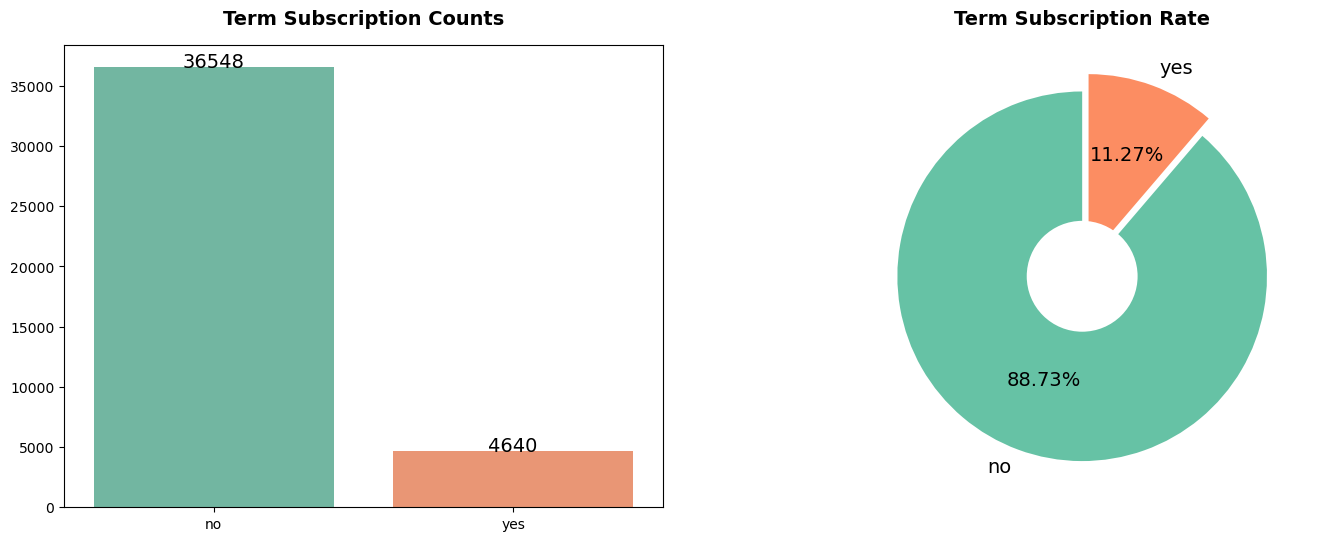

In [10]:

plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["y"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Term Subscription Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["no","yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Term Subscription Rate",fontweight="black",size=14 ,pad=15)

In [11]:
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(14, 8))
    value_1 = df[col].value_counts(ascending = False)

    value_2 = df[df[hue] == 'yes'][col].value_counts()

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index)
    plt.title(f"Term Subscription Probability by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

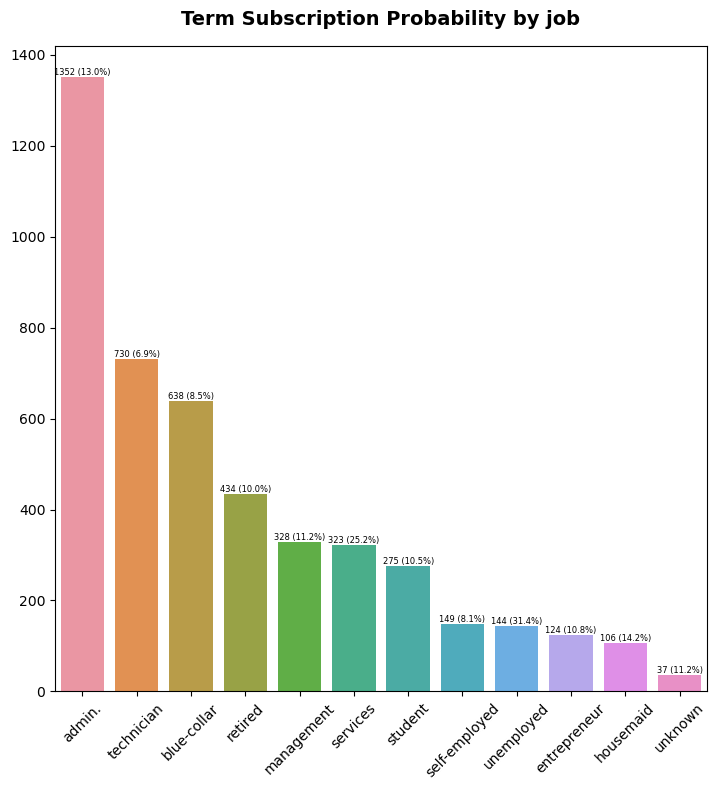

In [12]:
count_percent_plot(df, 'job', hue = 'y')

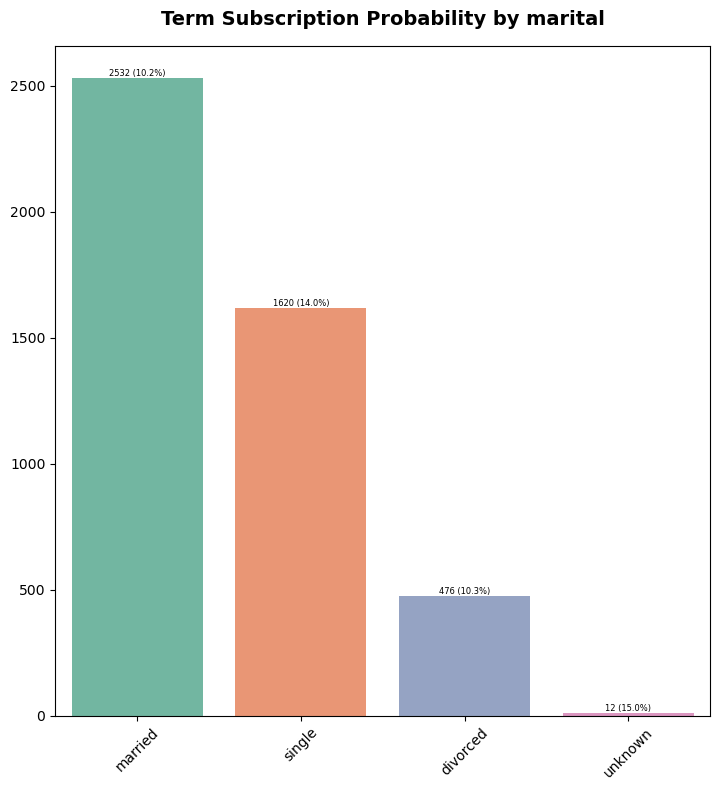

In [13]:
count_percent_plot(df, 'marital', hue = 'y')

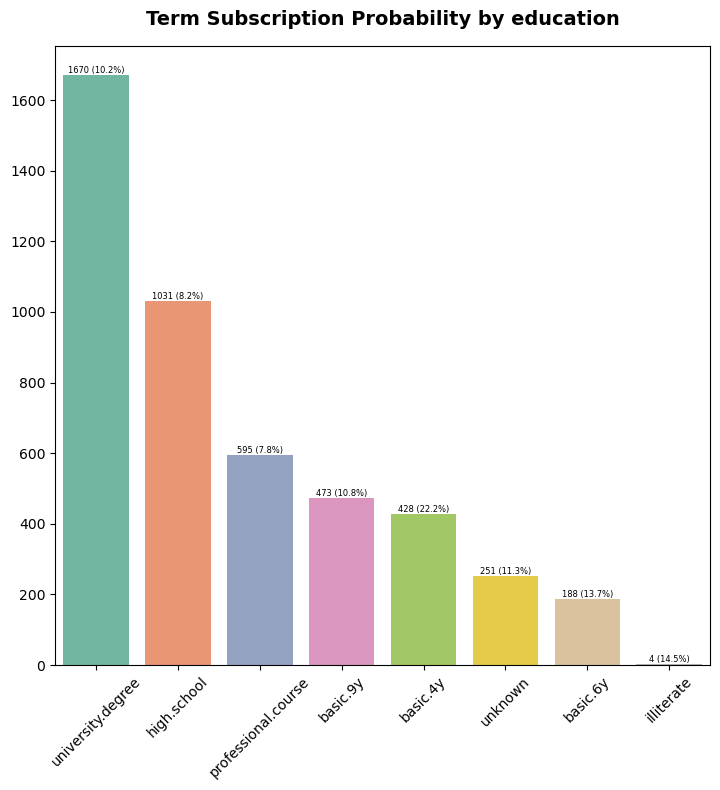

In [14]:
count_percent_plot(df, 'education', hue = 'y')

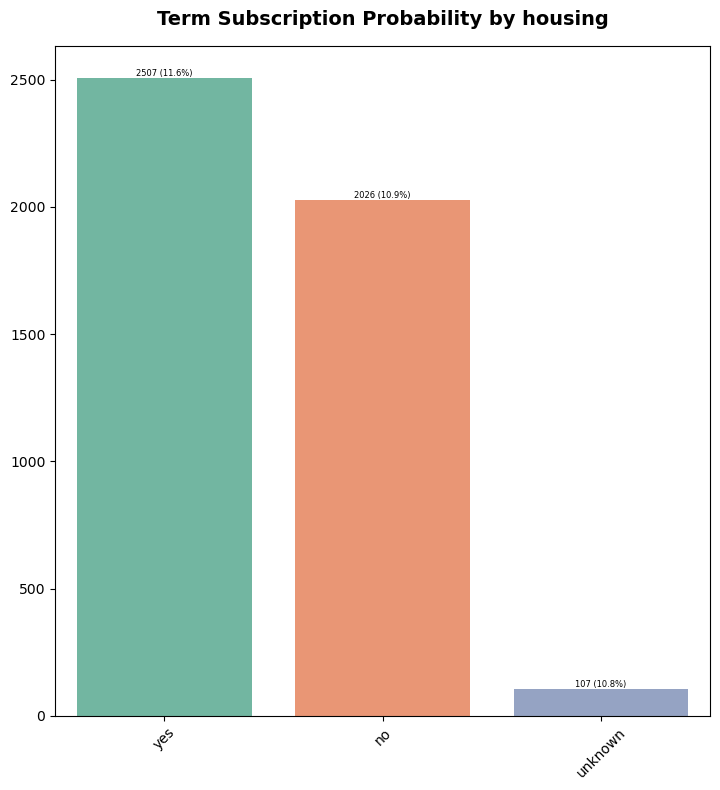

In [15]:
count_percent_plot(df, 'housing', hue = 'y')

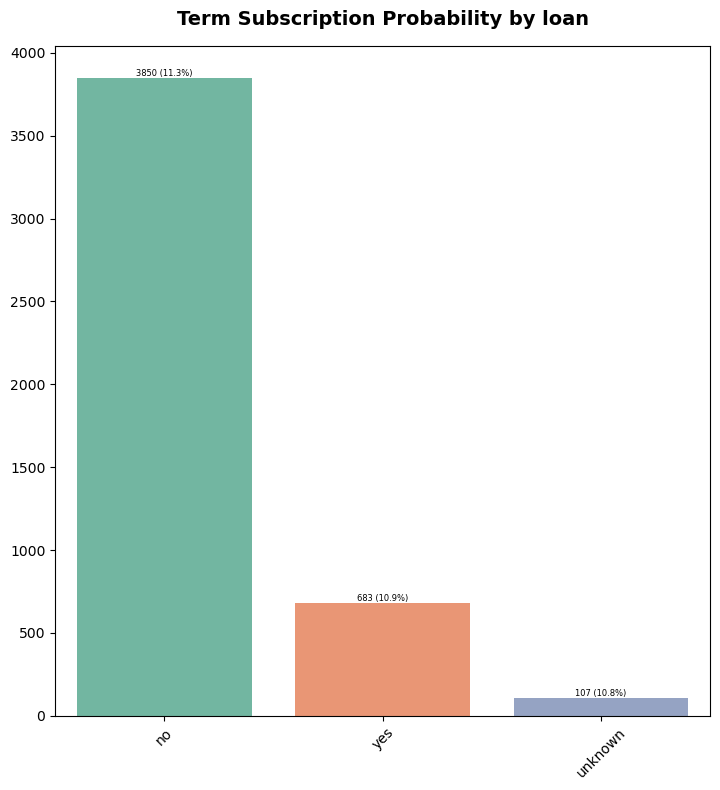

In [16]:
count_percent_plot(df, 'loan', hue = 'y')

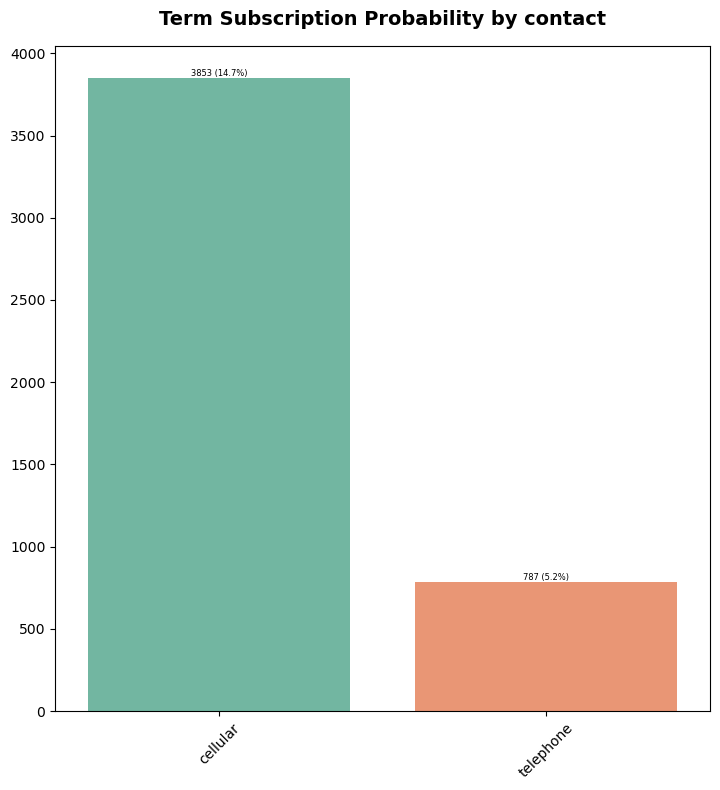

In [17]:
count_percent_plot(df, 'contact', hue = 'y')

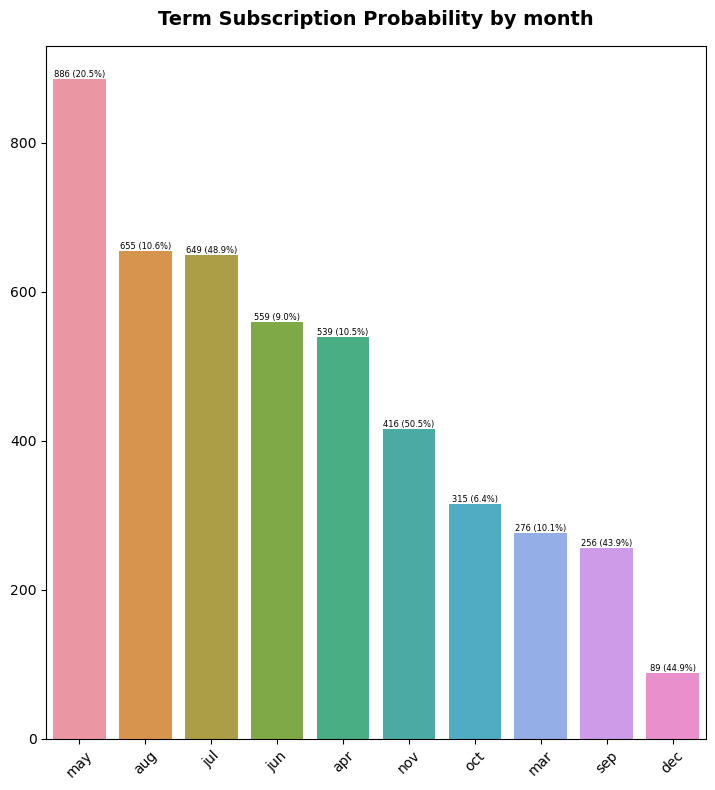

In [18]:
count_percent_plot(df, 'month', hue = 'y')

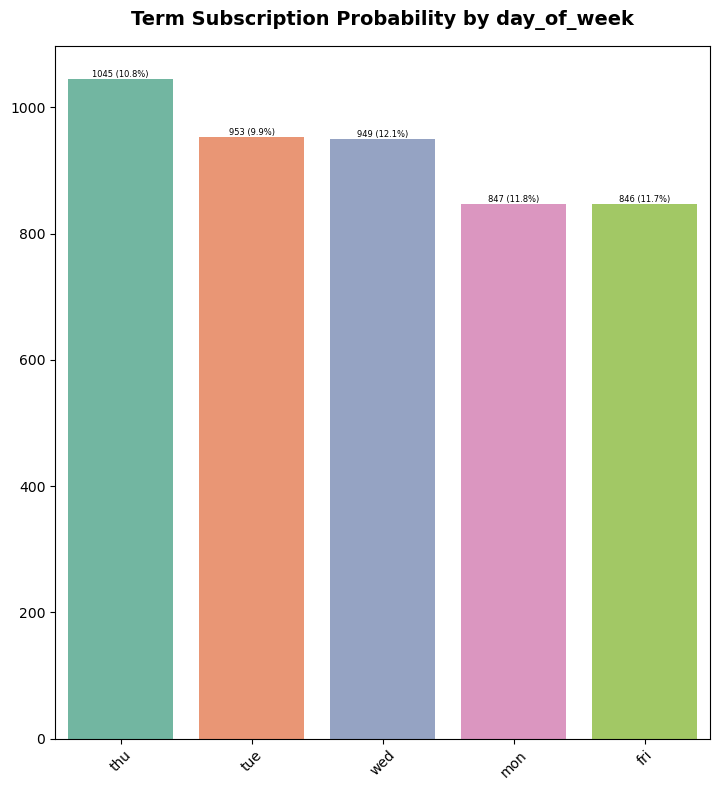

In [19]:
count_percent_plot(df, 'day_of_week', hue = 'y')

In [20]:
categories = ['job', 'marital', 'education', 'col_default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
categories

['job',
 'marital',
 'education',
 'col_default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [21]:
chi2_statistic = {}
p_values = {}

for col in categories:
    contingency_table = pd.crosstab(df[col], df['y'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

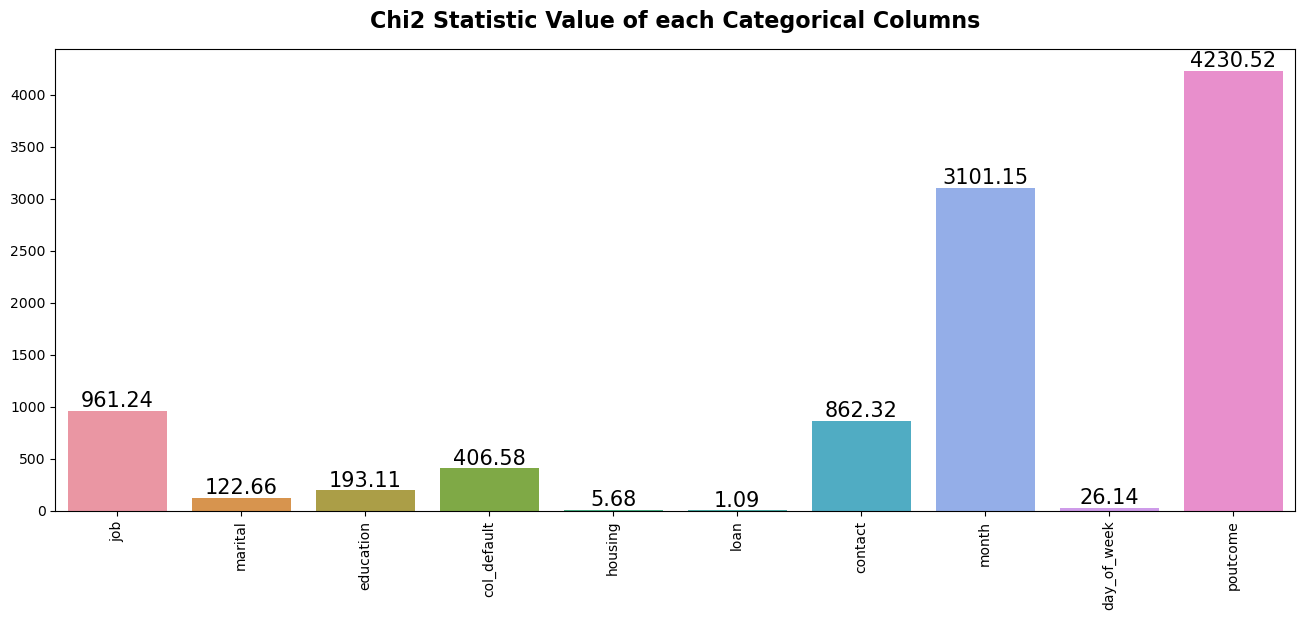

In [22]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

In [23]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

,Features,Chi_2 Statistic,P_value
0,job,961.242440,0.00000000000000000000
1,marital,122.655152,0.00000000000000000000
2,education,193.105905,0.00000000000000000000
3,col_default,406.577515,0.00000000000000000000
4,housing,5.684496,0.05829447669453451802
5,loan,1.094028,0.57867528704417536822
6,contact,862.318364,0.00000000000000000000
7,month,3101.149351,0.00000000000000000000
8,day_of_week,26.144939,0.00002958482005278532
9,poutcome,4230.523798,0.00000000000000000000


In [24]:
def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

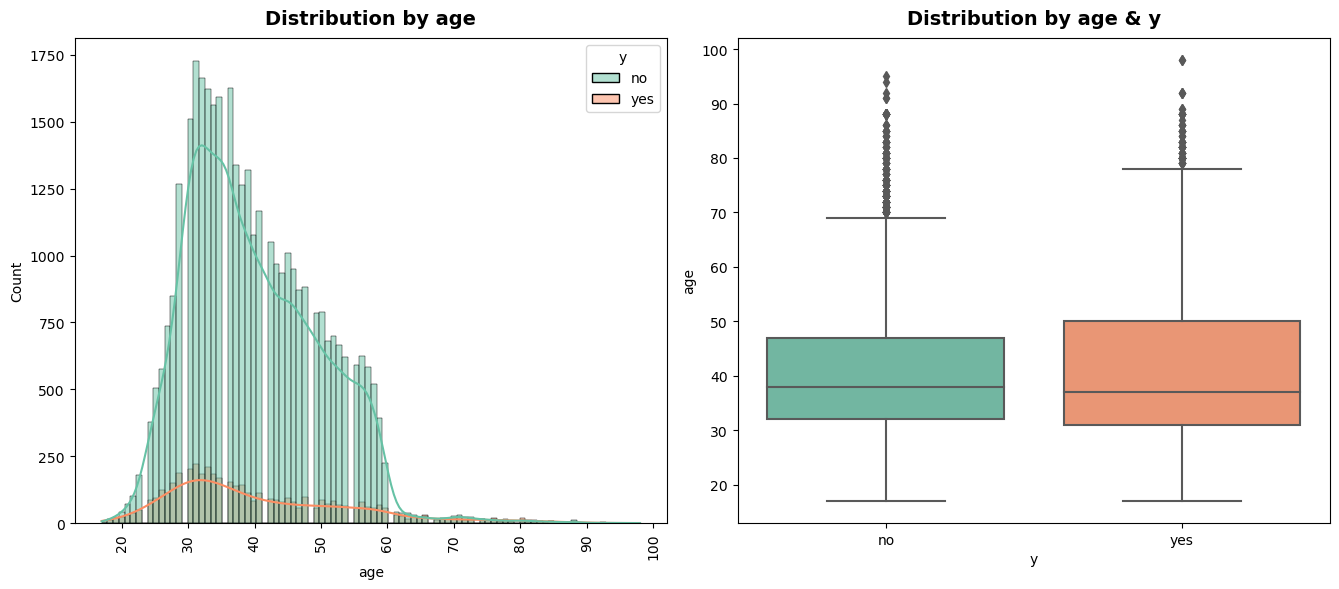

In [25]:
hist_with_hue(df, 'age', 'y')

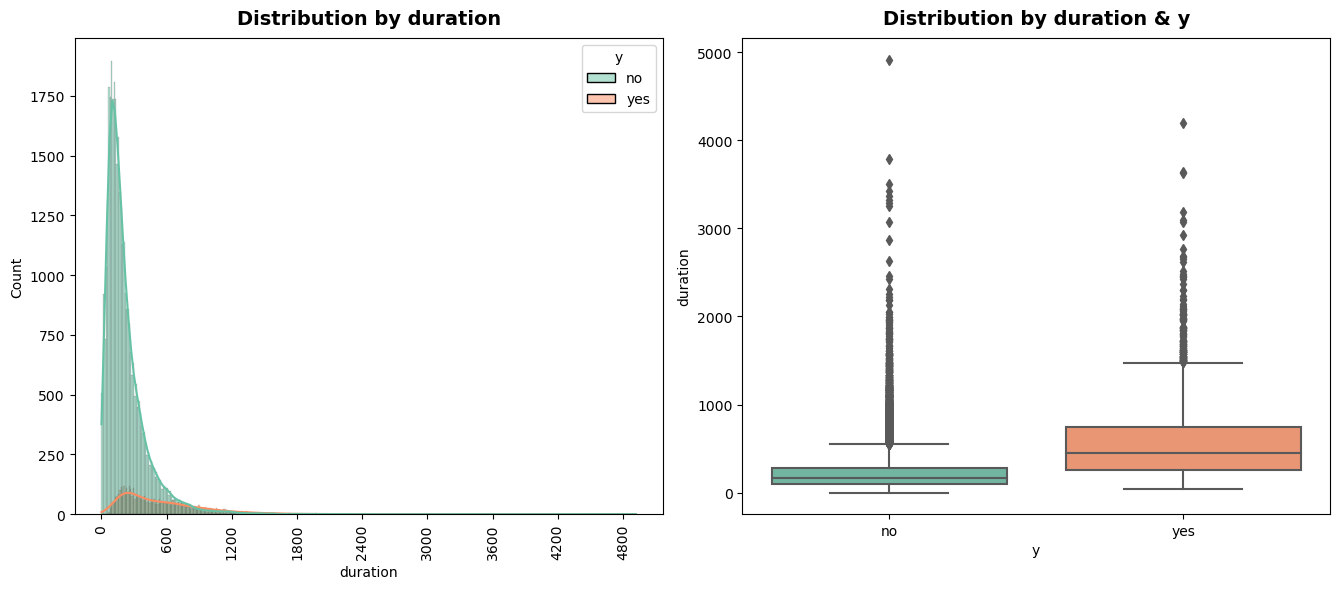

In [26]:
hist_with_hue(df, 'duration', 'y')

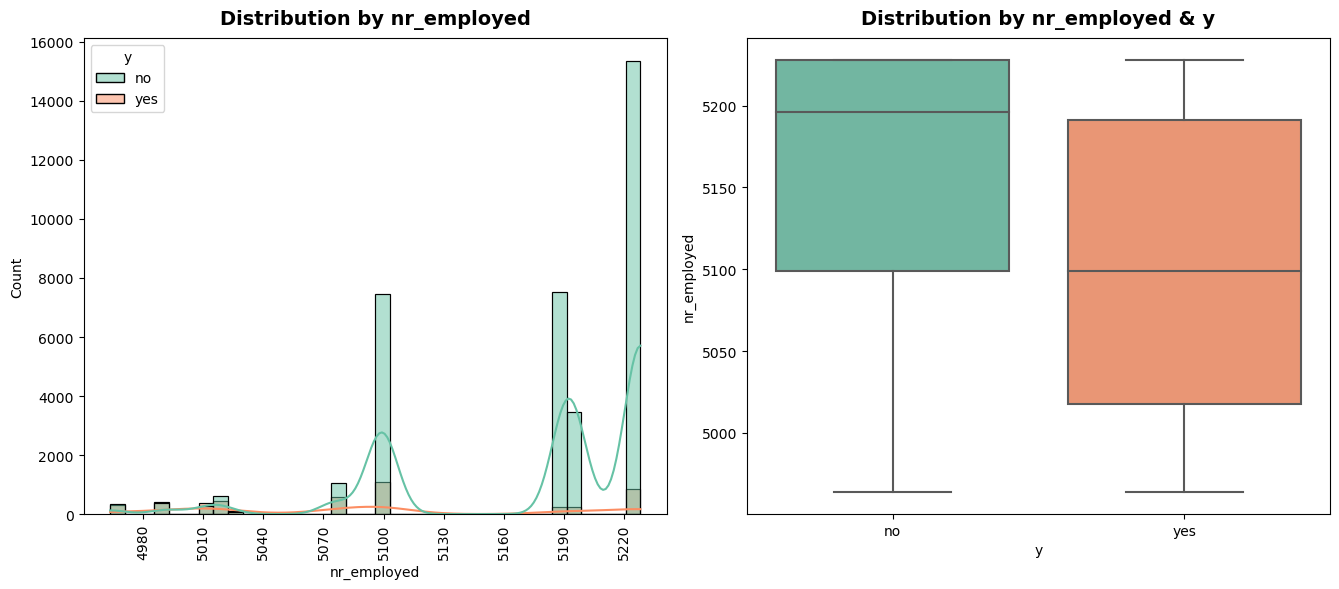

In [27]:
hist_with_hue(df, 'nr_employed', 'y')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   col_default     41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [29]:
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euriborthree', 'nr_employed']

In [30]:
def two_sample_t_test(df, columns, y):
    values = df[y].unique()
    group1 = df[df[y] == values[0]][columns]
    group2 = df[df[y] == values[1]][columns]
    t_stat, p_val = stats.ttest_ind(group1, group2)
    return t_stat, p_val

def test_results(df,numeric_columns,y):
    for col in numeric_columns:
            t_stat, p_val = two_sample_t_test(df, col, y)

            print(f"The {col} column has a T Statistic of {t_stat} and a P Value of {p_val}")

results = test_results(df,numeric_columns,'y')

The age column has a T Statistic of -6.172087109640128 and a P Value of 6.80213641846347e-10
The duration column has a T Statistic of -89.96722533490178 and a P Value of 0.0
The campaign column has a T Statistic of 13.496542997299589 and a P Value of 2.0077799906177142e-41
The pdays column has a T Statistic of 69.72211465560429 and a P Value of 0.0
The previous column has a T Statistic of -48.00267792469279 and a P Value of 0.0
The emp_var_rate column has a T Statistic of 63.43366555294075 and a P Value of 0.0
The cons_price_idx column has a T Statistic of 27.90322177968845 and a P Value of 9.318964779944275e-170
The cons_conf_idx column has a T Statistic of -11.153921944215295 and a P Value of 7.536664996589982e-29
The euriborthree column has a T Statistic of 65.64662251866277 and a P Value of 0.0
The nr_employed column has a T Statistic of 76.98448315100892 and a P Value of 0.0


In [31]:
corr_df = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euriborthree', 'nr_employed','pred']]

<Axes: title={'center': 'Correlation Matrix to Dataset Features'}>

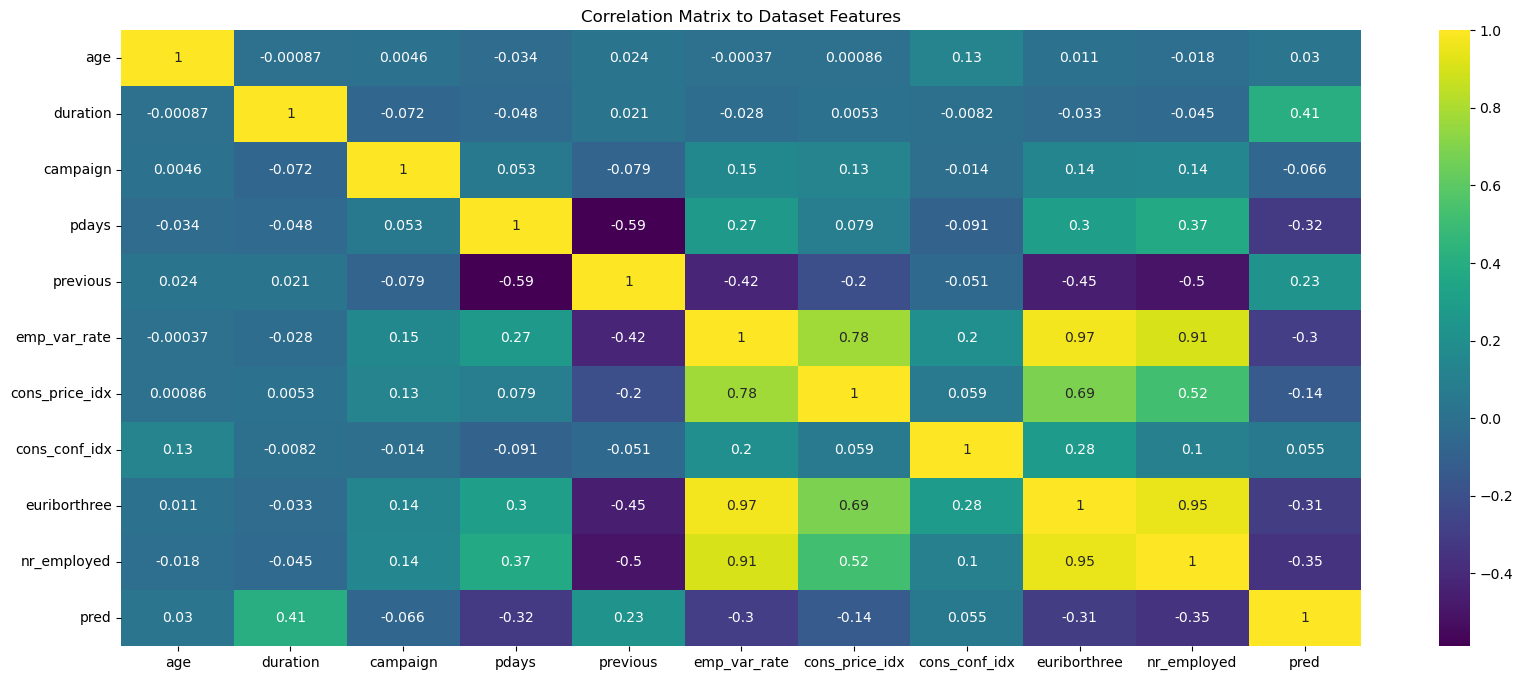

In [32]:
plt.figure(figsize=(20,8))
plt.title('Correlation Matrix to Dataset Features')
sns.heatmap(corr_df.corr(),cmap='viridis',annot=True)

In [33]:
corr_df.corr()['pred'].sort_values(ascending = False)

pred              1.000000
duration          0.405274
previous          0.230181
cons_conf_idx     0.054878
age               0.030399
campaign         -0.066357
cons_price_idx   -0.136211
emp_var_rate     -0.298334
euriborthree     -0.307771
pdays            -0.324914
nr_employed      -0.354678
Name: pred, dtype: float64

Ttest_indResult(statistic=inf, pvalue=0.0)
-1.0410564301652374


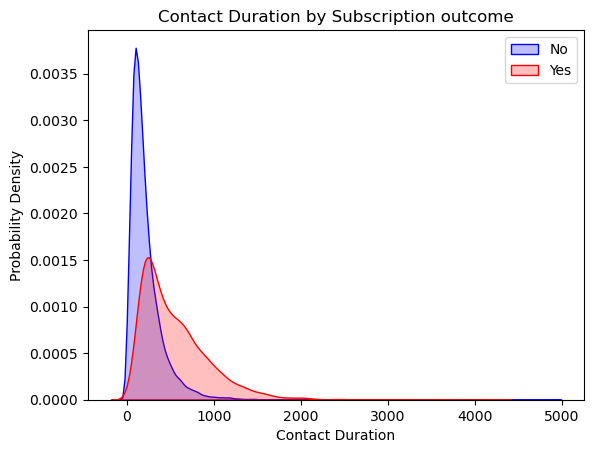

In [119]:

sns.kdeplot(df.loc[(df['pred']==0),'duration'], color='b', fill=True, label='No')
 
sns.kdeplot(df.loc[(df['pred']==1),'duration'], color='r', fill=True, label='Yes')
 
plt.xlabel('Contact Duration')
plt.ylabel('Probability Density')
plt.title('Contact Duration by Subscription outcome')
plt.legend()


group1 = df[df['pred']==1]
group2 = df[df['pred']==0]

print(ttest_ind(group1['pred'], group2['pred'], equal_var = False))

# test conditions
c0 = df[df['pred']==0]['duration']
c1 = df[df['pred']==1]['duration']

cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))

print(cohens_d)

Ttest_indResult(statistic=inf, pvalue=0.0)
0.6451260301737883


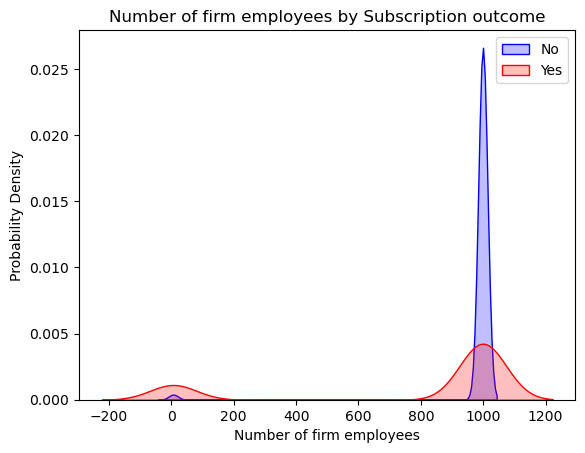

In [123]:
sns.kdeplot(df.loc[(df['pred']==0),'pdays'], color='b', fill=True, label='No')
 
sns.kdeplot(df.loc[(df['pred']==1),'pdays'], color='r', fill=True, label='Yes')
 
plt.xlabel('Number of firm employees')
plt.ylabel('Probability Density')
plt.title('Number of firm employees by Subscription outcome')
plt.legend()


group1 = df[df['pred']==1]
group2 = df[df['pred']==0]

print(ttest_ind(group1['pred'], group2['pred'], equal_var = False))

# test conditions
c0 = df[df['pred']==0]['pdays']
c1 = df[df['pred']==1]['pdays']

cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))

print(cohens_d)

In [125]:
df.groupby('pred').pdays.mean()

pred
0    984.113878
1    792.035560
Name: pdays, dtype: float64

In [117]:
stats.bartlett(c0,c1)

BartlettResult(statistic=4987.0759778711, pvalue=0.0)

In [118]:
df.groupby('pred').duration.mean()

pred
0    220.844807
1    553.191164
Name: duration, dtype: float64

In [34]:
#modeling

In [35]:
corr_df = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euriborthree', 'nr_employed','pred']]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   col_default     41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [37]:
df = df[['job',
 'col_default',
 'age',
 'cons_conf_idx',
 'euriborthree',
 'nr_employed',
 'pdays',
 'marital',
 'previous',
 'month',
 'cons_price_idx',
 'education',
 'duration',
 'day_of_week',
 'contact',
 'poutcome',
 'campaign',    
 'emp_var_rate','pred']]

In [38]:
def encoding(column, dataset):
    coding_values = dataset[column].unique()
    return {value: val for val, value in enumerate(coding_values)}

In [39]:
category_types = df.select_dtypes("object").columns

for column in category_types:
    mapping = encoding(column, df)
    
    df[column] = df[column].replace(mapping).astype("int64")

In [40]:
df

,job,col_default,age,cons_conf_idx,euriborthree,nr_employed,pdays,marital,previous,month,cons_price_idx,education,duration,day_of_week,contact,poutcome,campaign,emp_var_rate,pred
0,0,0,45.0,-46.2,1.266,5099.1,999.0,0,0.0,0,92.893,0,8.0,0,0,0,5.0,-1.8,0
1,0,1,36.0,-47.1,1.423,5099.1,999.0,0,0.0,1,93.075,0,283.0,1,0,0,2.0,-1.8,0
2,0,1,35.0,-36.4,4.857,5191.0,999.0,0,0.0,0,93.994,0,36.0,2,1,0,1.0,1.1,0
3,0,0,42.0,-46.2,1.327,5099.1,999.0,1,0.0,0,92.893,0,560.0,0,0,0,3.0,-1.8,0
4,1,1,44.0,-36.1,4.967,5228.1,999.0,0,0.0,2,93.444,0,125.0,2,0,0,2.0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2,0,54.0,-47.1,1.479,5099.1,999.0,0,1.0,1,93.075,7,105.0,3,0,2,1.0,-1.8,0
41184,0,0,31.0,-36.4,4.864,5191.0,999.0,1,0.0,0,93.994,7,273.0,3,1,0,2.0,1.1,0
41185,0,1,46.0,-36.4,4.857,5191.0,999.0,0,0.0,0,93.994,7,67.0,3,1,0,1.0,1.1,0
41186,2,0,53.0,-36.1,4.965,5228.1,999.0,0,0.0,2,93.444,7,152.0,4,0,0,2.0,1.4,0


In [41]:
X = df.drop(['pred'],axis=1)
y = df['pred']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [44]:
#model results comparsion
column_names = ["Classifier","accuracy","precision","recall","f1"]
model_results = pd.DataFrame(columns=column_names)

In [45]:
# model 1 Naive Bayes

In [46]:
nb = GaussianNB()
nb.fit(scaled_X_train, y_train)
nb_preds = nb.predict(scaled_X_test)

In [47]:
nb_accuracy_score = accuracy_score(y_test,nb_preds)
nb_precision_score = precision_score(y_test,nb_preds)
nb_recall_score = recall_score(y_test,nb_preds)
nb_f1_score = f1_score(y_test,nb_preds)

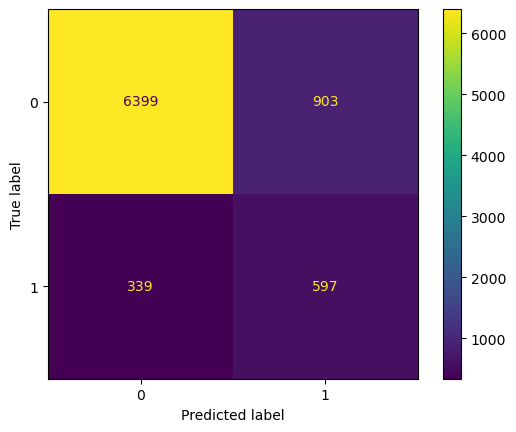

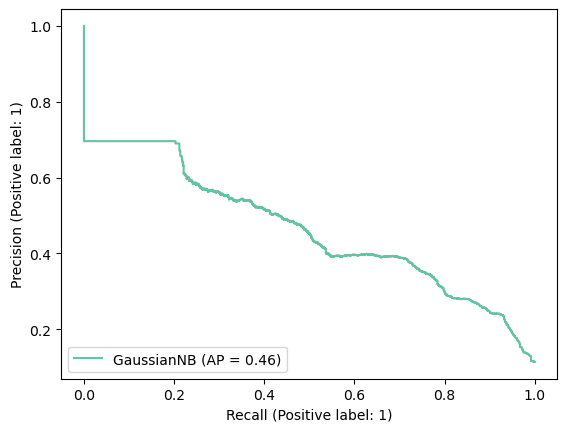

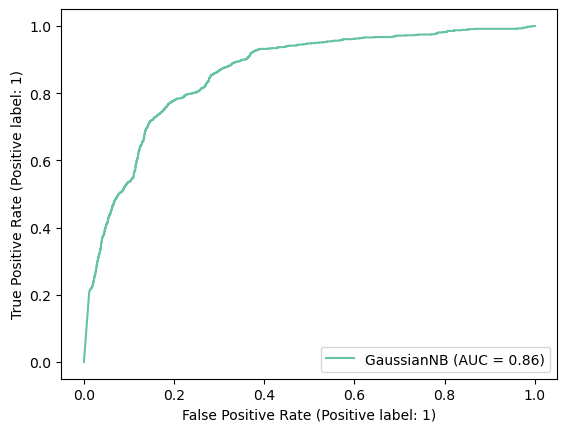

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7302
           1       0.40      0.64      0.49       936

    accuracy                           0.85      8238
   macro avg       0.67      0.76      0.70      8238
weighted avg       0.89      0.85      0.86      8238



In [48]:
    cm = confusion_matrix(y_test,nb_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=nb.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(nb, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(nb, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,nb_preds))

In [49]:
model_results.loc[len(model_results)] = ["Naive Bayes",nb_accuracy_score,nb_precision_score,nb_recall_score,nb_f1_score]

In [50]:
# model 2 Logistic Regression

In [51]:
lr = LogisticRegression(random_state=42)
lr.fit(scaled_X_train, y_train)
lr_preds = lr.predict(scaled_X_test)

In [52]:
lr_accuracy_score = accuracy_score(y_test,lr_preds)
lr_precision_score = precision_score(y_test,lr_preds)
lr_recall_score = recall_score(y_test,lr_preds)
lr_f1_score = f1_score(y_test,lr_preds)

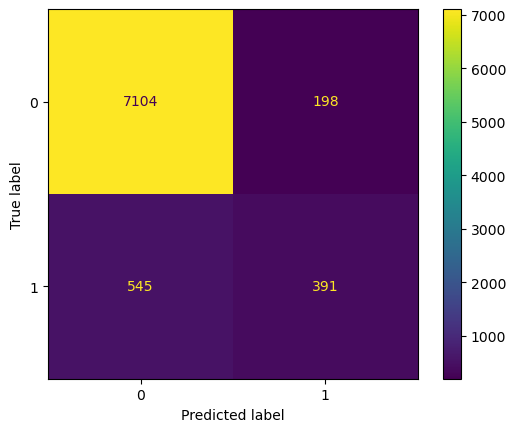

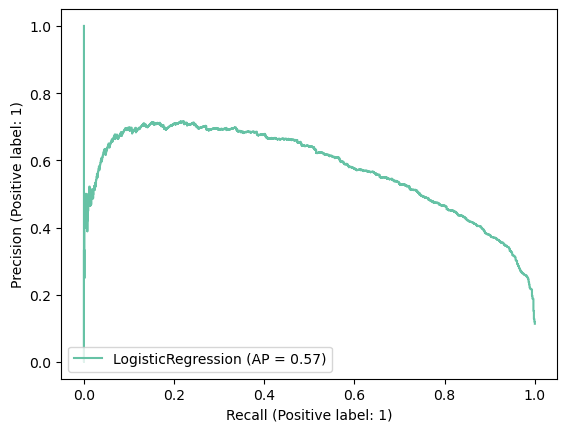

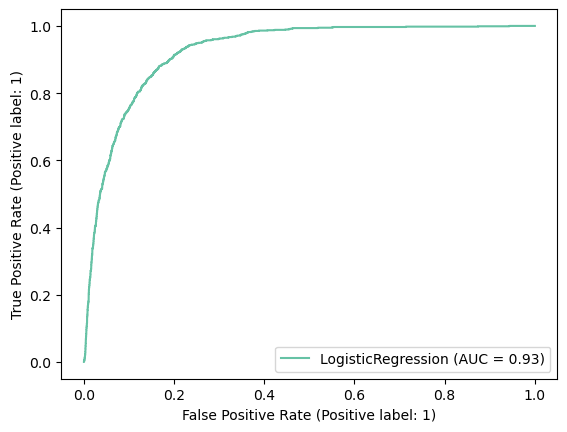

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7302
           1       0.66      0.42      0.51       936

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [53]:
    cm = confusion_matrix(y_test,lr_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lr.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(lr, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(lr, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,lr_preds))

In [54]:
model_results.loc[len(model_results)] = ["Logistic Regression",lr_accuracy_score,lr_precision_score,lr_recall_score,lr_f1_score]

In [55]:
# model 3 Random Forest

In [56]:
rf =RandomForestClassifier(random_state = 42)
rf.fit(scaled_X_train, y_train)
rf_preds = rf.predict(scaled_X_test)

In [57]:
rf_accuracy_score = accuracy_score(y_test,rf_preds)
rf_precision_score = precision_score(y_test,rf_preds)
rf_recall_score = recall_score(y_test,rf_preds)
rf_f1_score = f1_score(y_test,rf_preds)

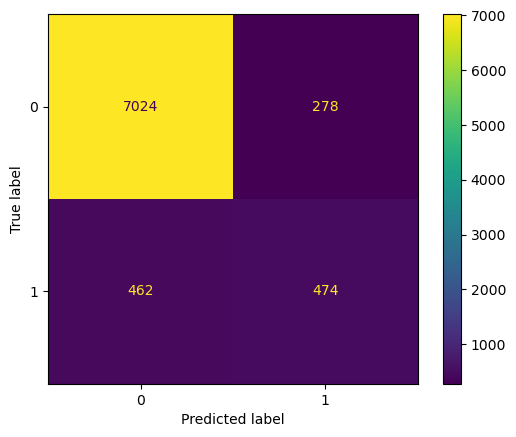

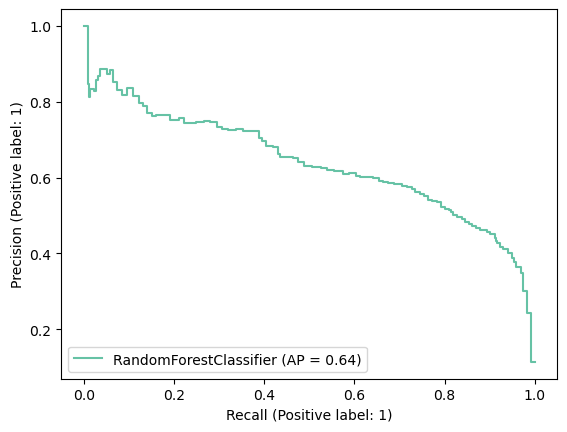

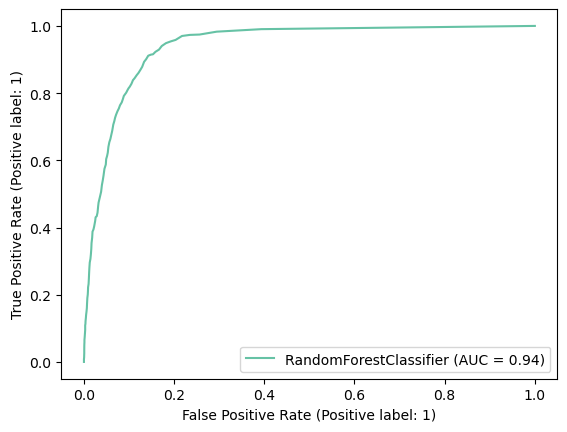

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7302
           1       0.63      0.51      0.56       936

    accuracy                           0.91      8238
   macro avg       0.78      0.73      0.76      8238
weighted avg       0.90      0.91      0.91      8238



In [58]:
    cm = confusion_matrix(y_test,rf_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(rf, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(rf, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,rf_preds))

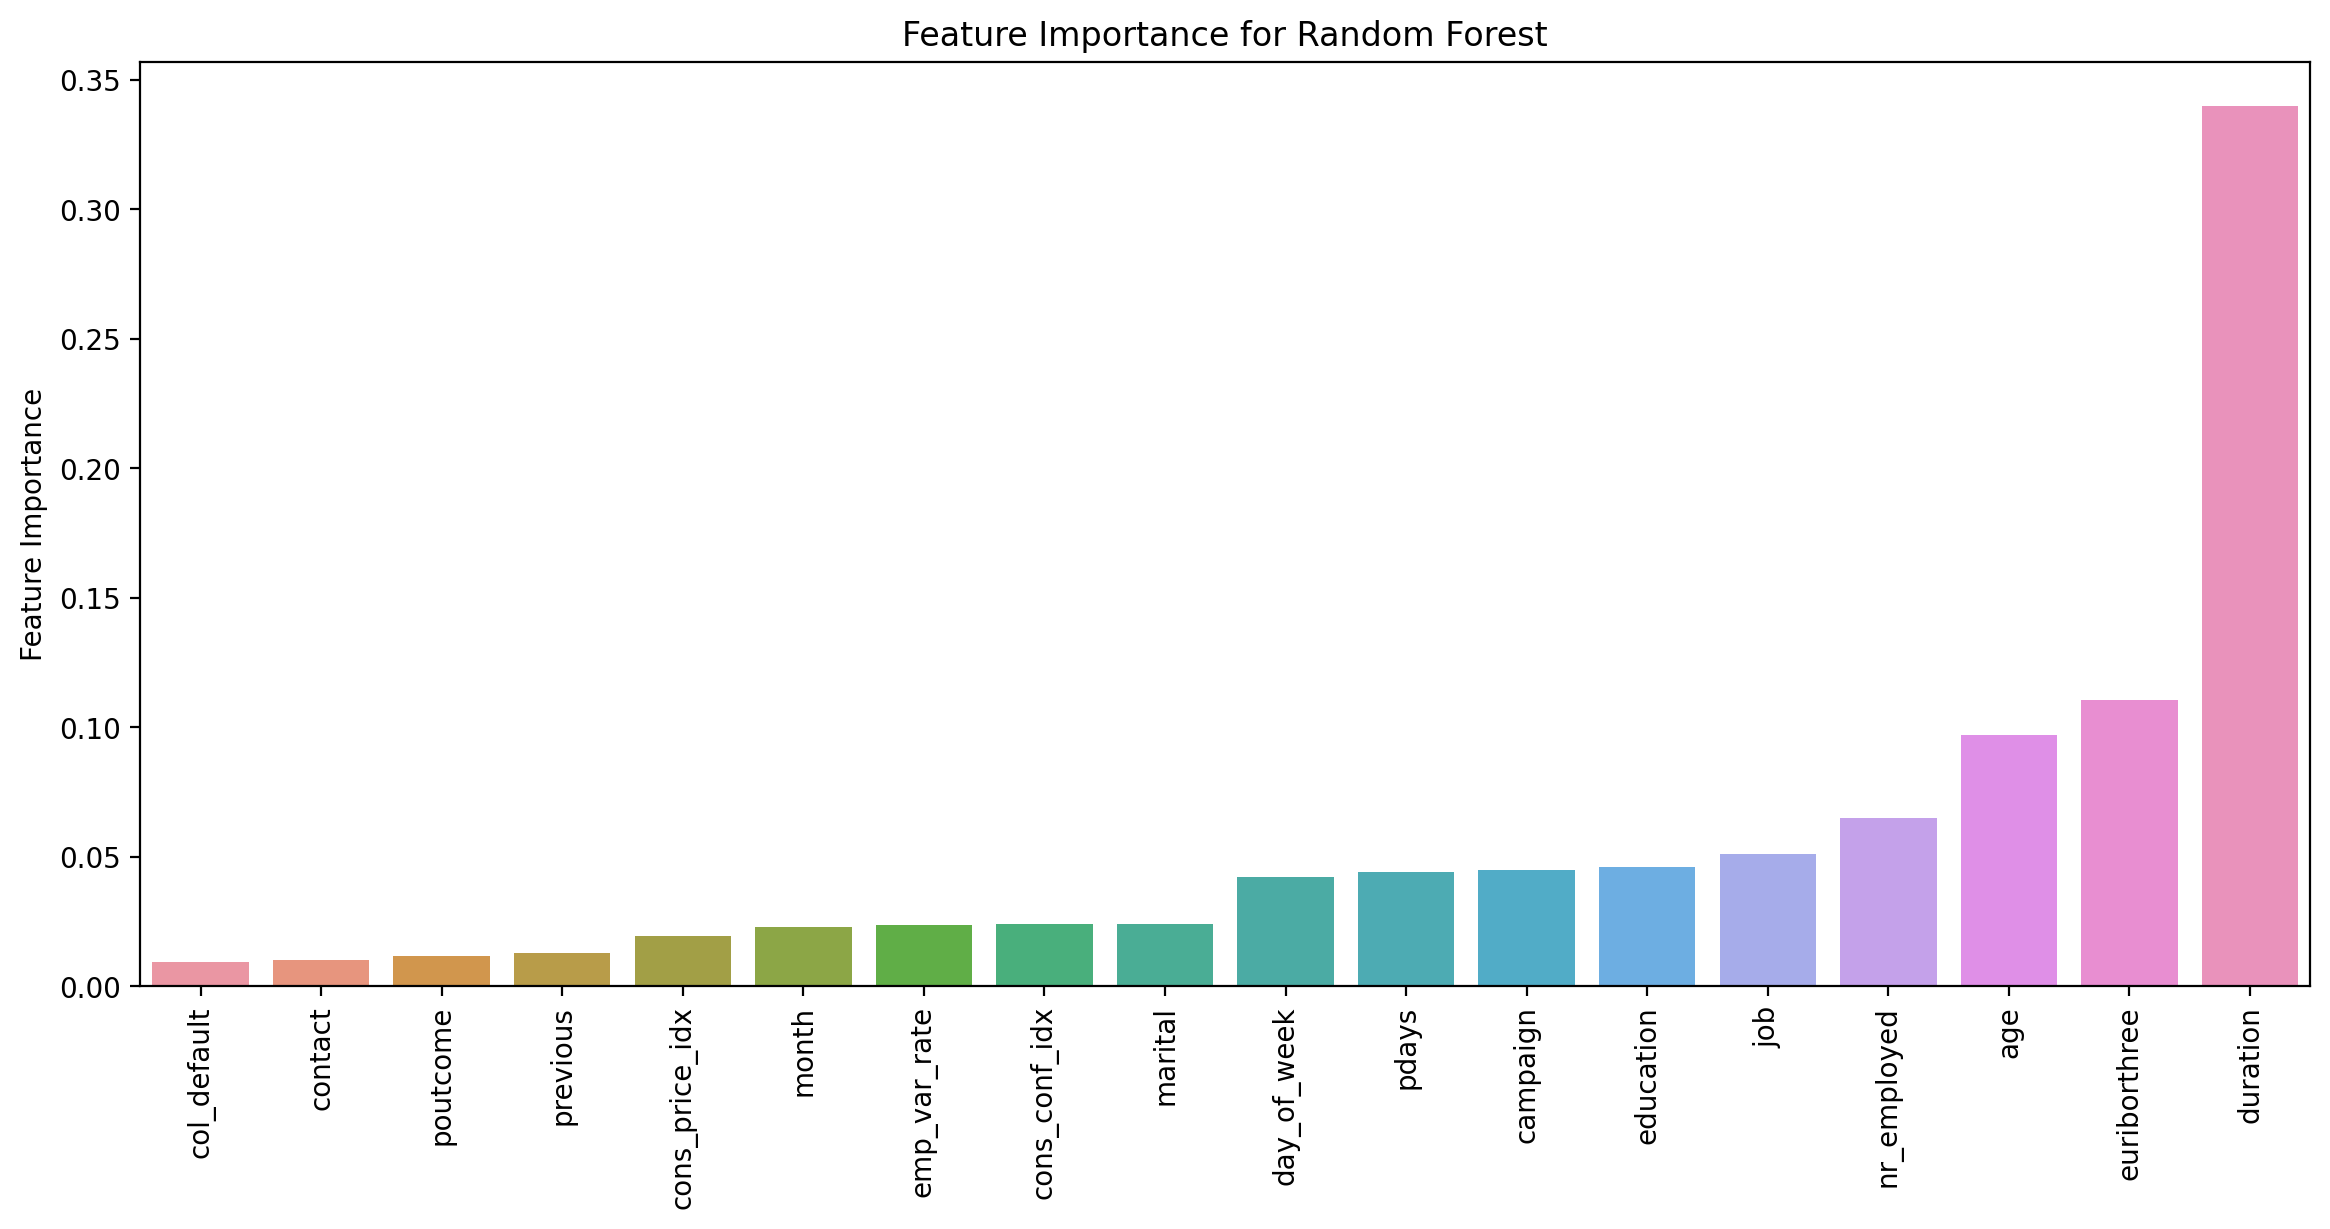

In [59]:
imp_feats = pd.DataFrame(data=rf.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Random Forest");

In [60]:
model_results.loc[len(model_results)] = ["Random Forest Classifier",rf_accuracy_score,rf_precision_score,rf_recall_score,rf_f1_score]

In [61]:
# model 4 XGBoost

In [62]:
xgbc = xgb.XGBClassifier()
xgbc.fit(scaled_X_train, y_train)
xgbc_preds = xgbc.predict(scaled_X_test)

In [63]:
xgbc_accuracy_score = accuracy_score(y_test,xgbc_preds)
xgbc_precision_score = precision_score(y_test,xgbc_preds)
xgbc_recall_score = recall_score(y_test,xgbc_preds)
xgbc_f1_score = f1_score(y_test,xgbc_preds)

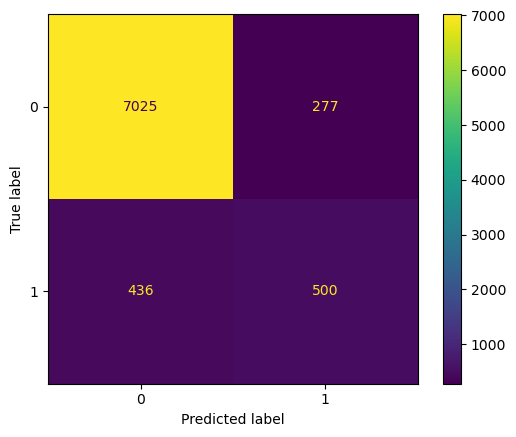

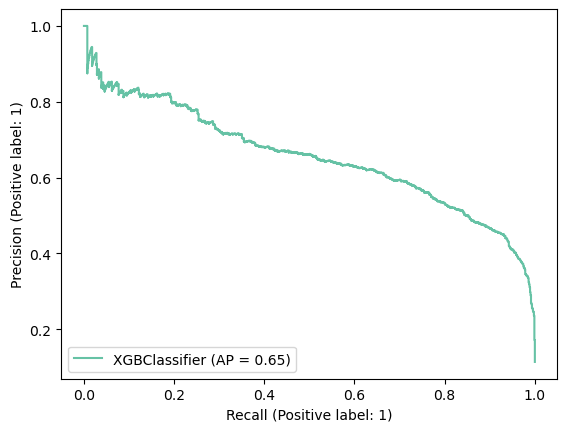

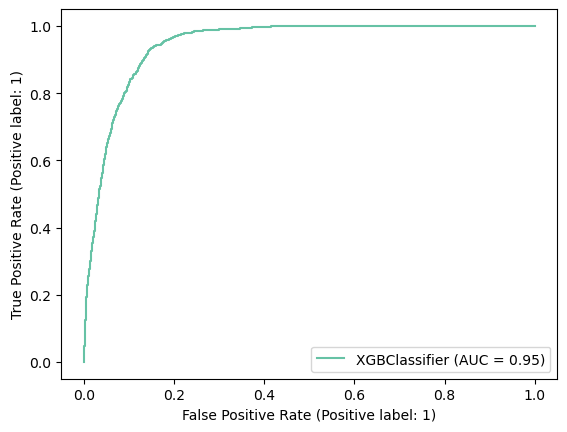

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7302
           1       0.64      0.53      0.58       936

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [64]:
    cm = confusion_matrix(y_test,xgbc_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgbc.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(xgbc, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(xgbc, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,xgbc_preds))

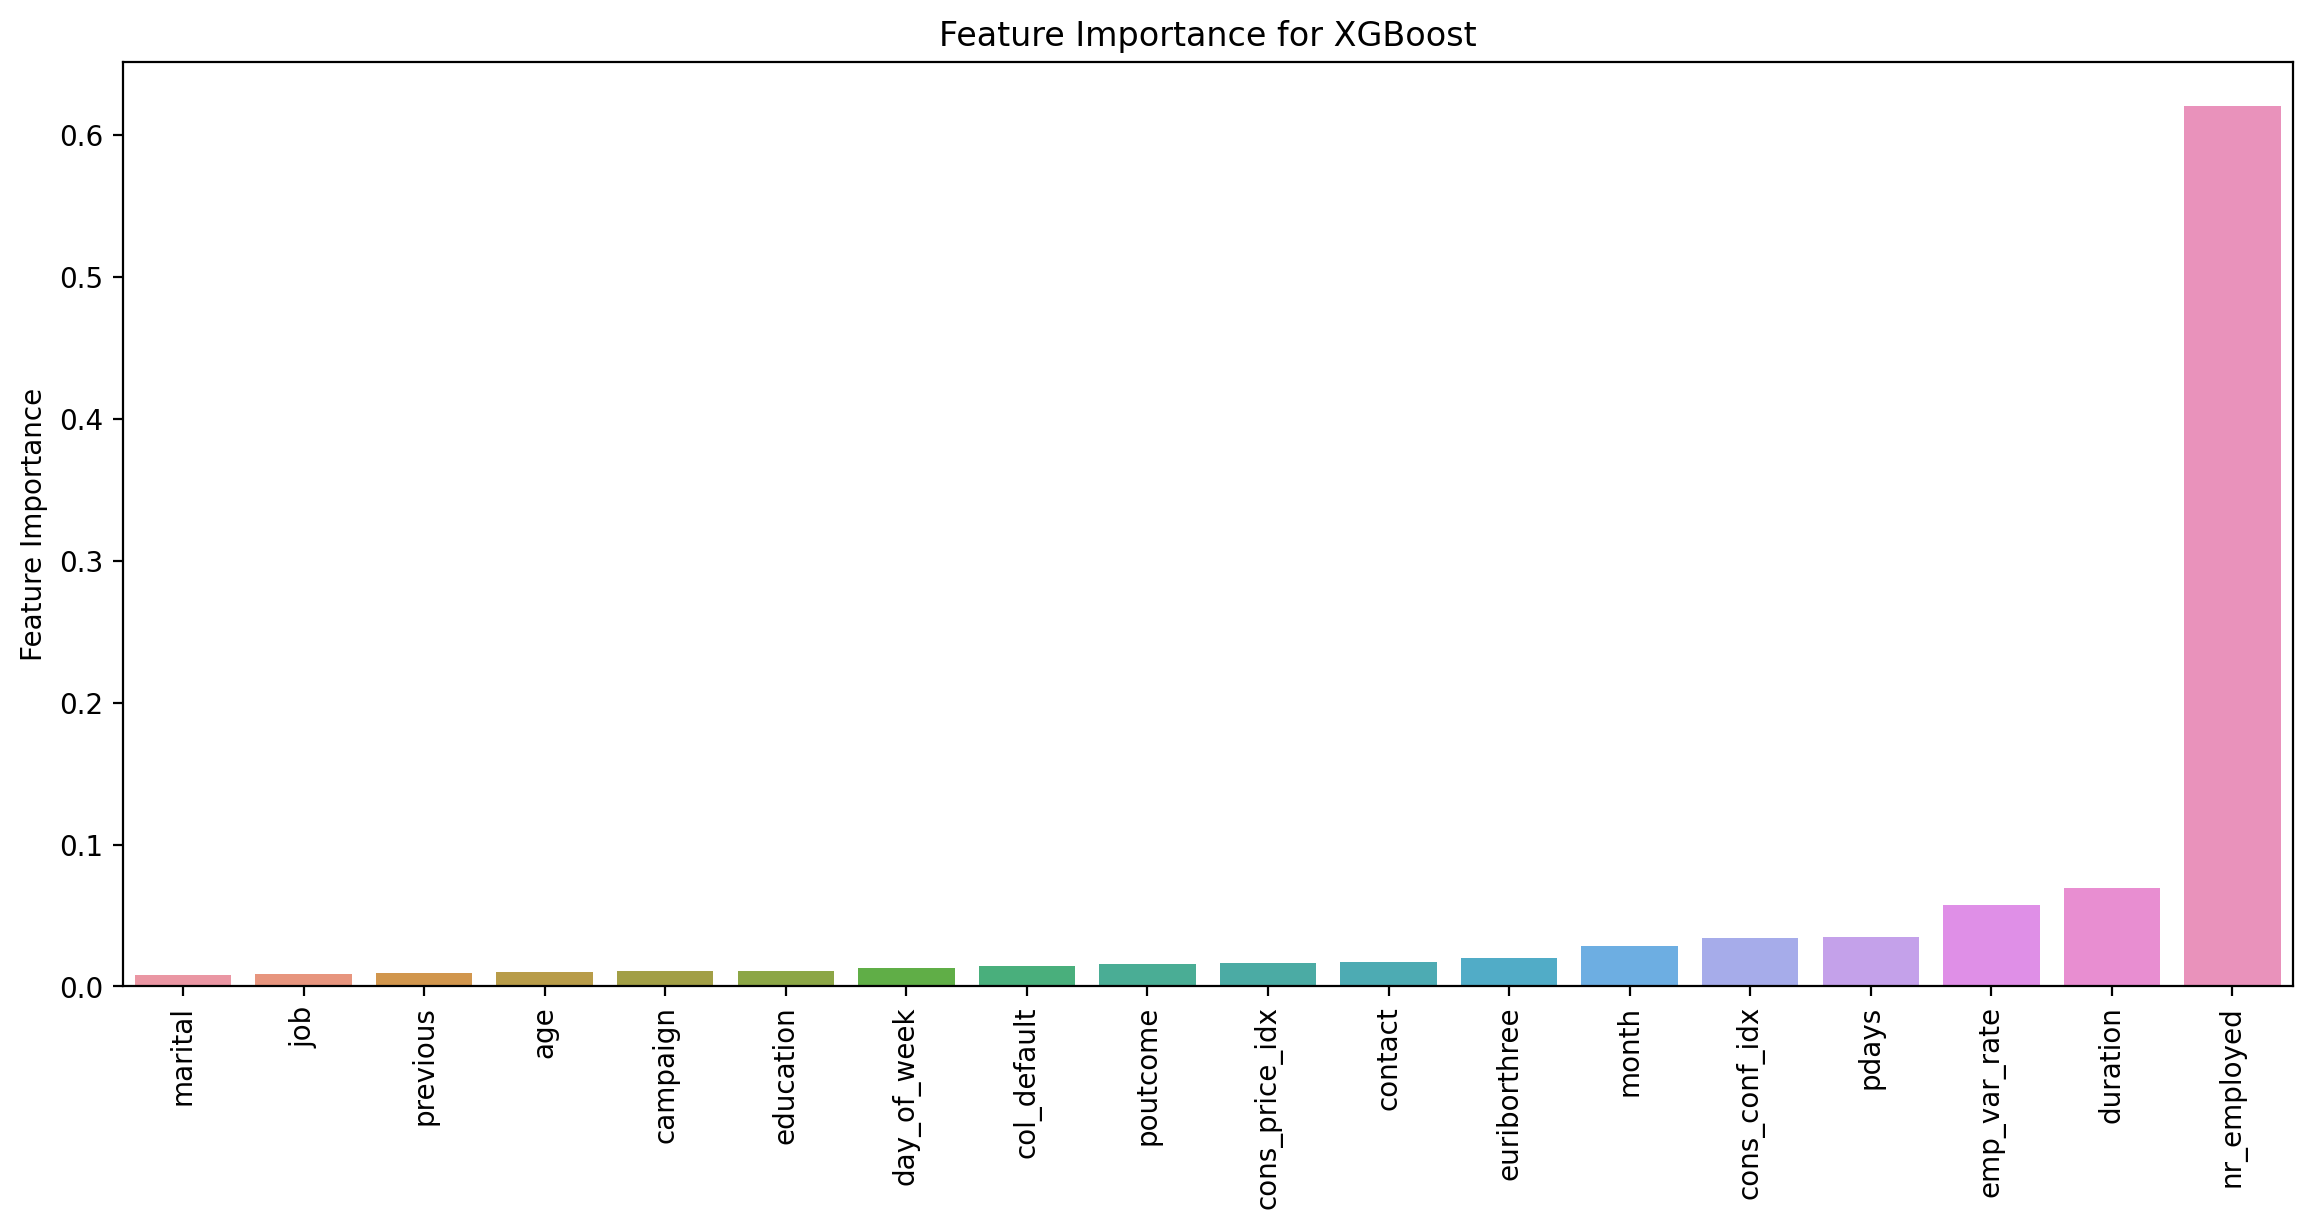

In [65]:
imp_feats = pd.DataFrame(data=xgbc.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for XGBoost");

In [66]:
model_results.loc[len(model_results)] = ["XGBoost Classifier",xgbc_accuracy_score,xgbc_precision_score,xgbc_recall_score,xgbc_f1_score]

In [67]:
# model 5 KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_X_train, y_train)
knn_preds = knn.predict(scaled_X_test)

In [69]:
knn_accuracy_score = accuracy_score(y_test,knn_preds)
knn_precision_score = precision_score(y_test,knn_preds)
knn_recall_score = recall_score(y_test,knn_preds)
knn_f1_score = f1_score(y_test,knn_preds)

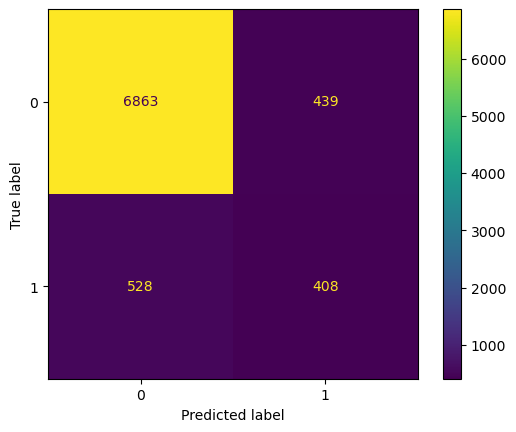

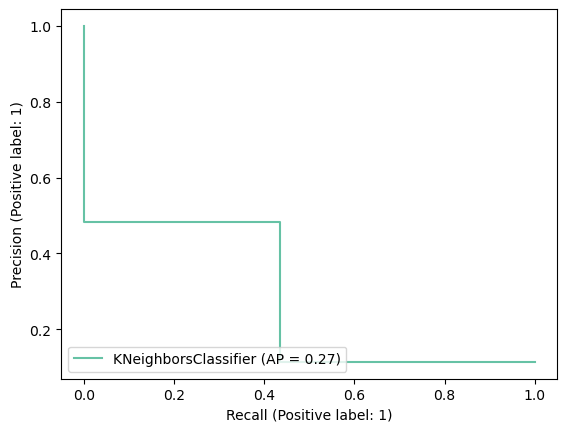

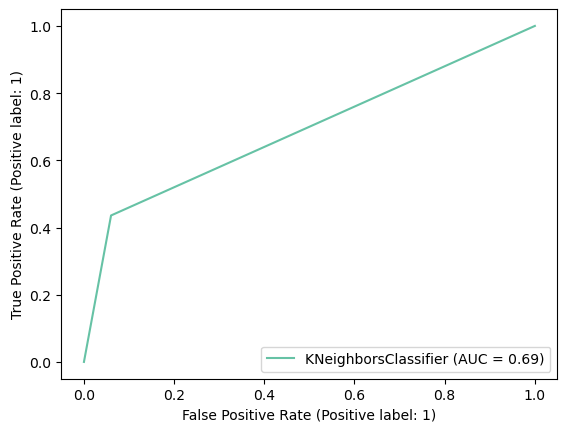

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7302
           1       0.48      0.44      0.46       936

    accuracy                           0.88      8238
   macro avg       0.71      0.69      0.70      8238
weighted avg       0.88      0.88      0.88      8238



In [70]:
    cm = confusion_matrix(y_test,knn_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(knn, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(knn, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,knn_preds))

In [71]:
model_results.loc[len(model_results)] = ["KNN Classifier",knn_accuracy_score,knn_precision_score,knn_recall_score,knn_f1_score]

In [72]:
# model 6 Decision Tree

In [73]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(scaled_X_train, y_train)
dtc_preds = dtc.predict(scaled_X_test)

In [74]:
dtc_accuracy_score = accuracy_score(y_test,dtc_preds)
dtc_precision_score = precision_score(y_test,dtc_preds)
dtc_recall_score = recall_score(y_test,dtc_preds)
dtc_f1_score = f1_score(y_test,dtc_preds)

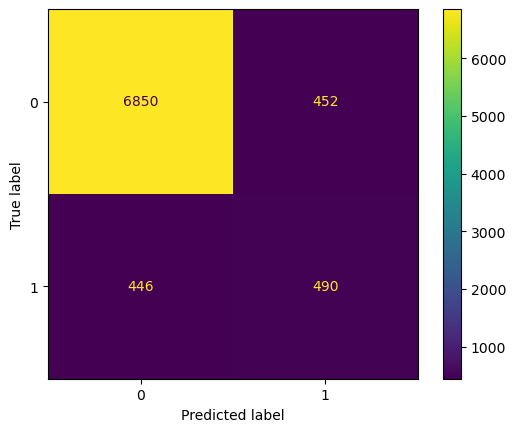

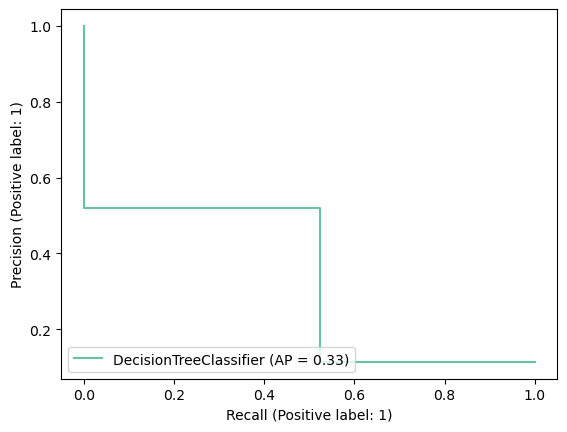

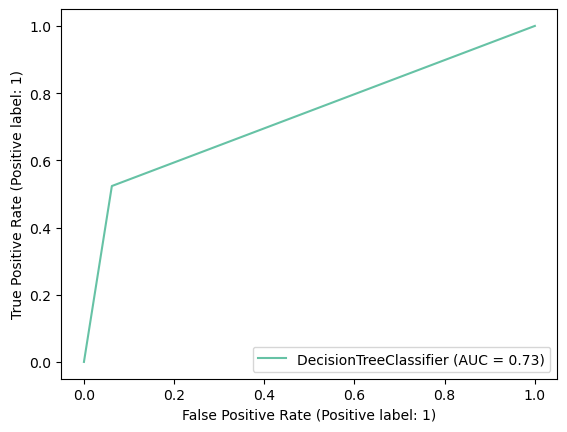

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7302
           1       0.52      0.52      0.52       936

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



In [75]:
    cm = confusion_matrix(y_test,dtc_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dtc.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(dtc, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(dtc, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,dtc_preds))

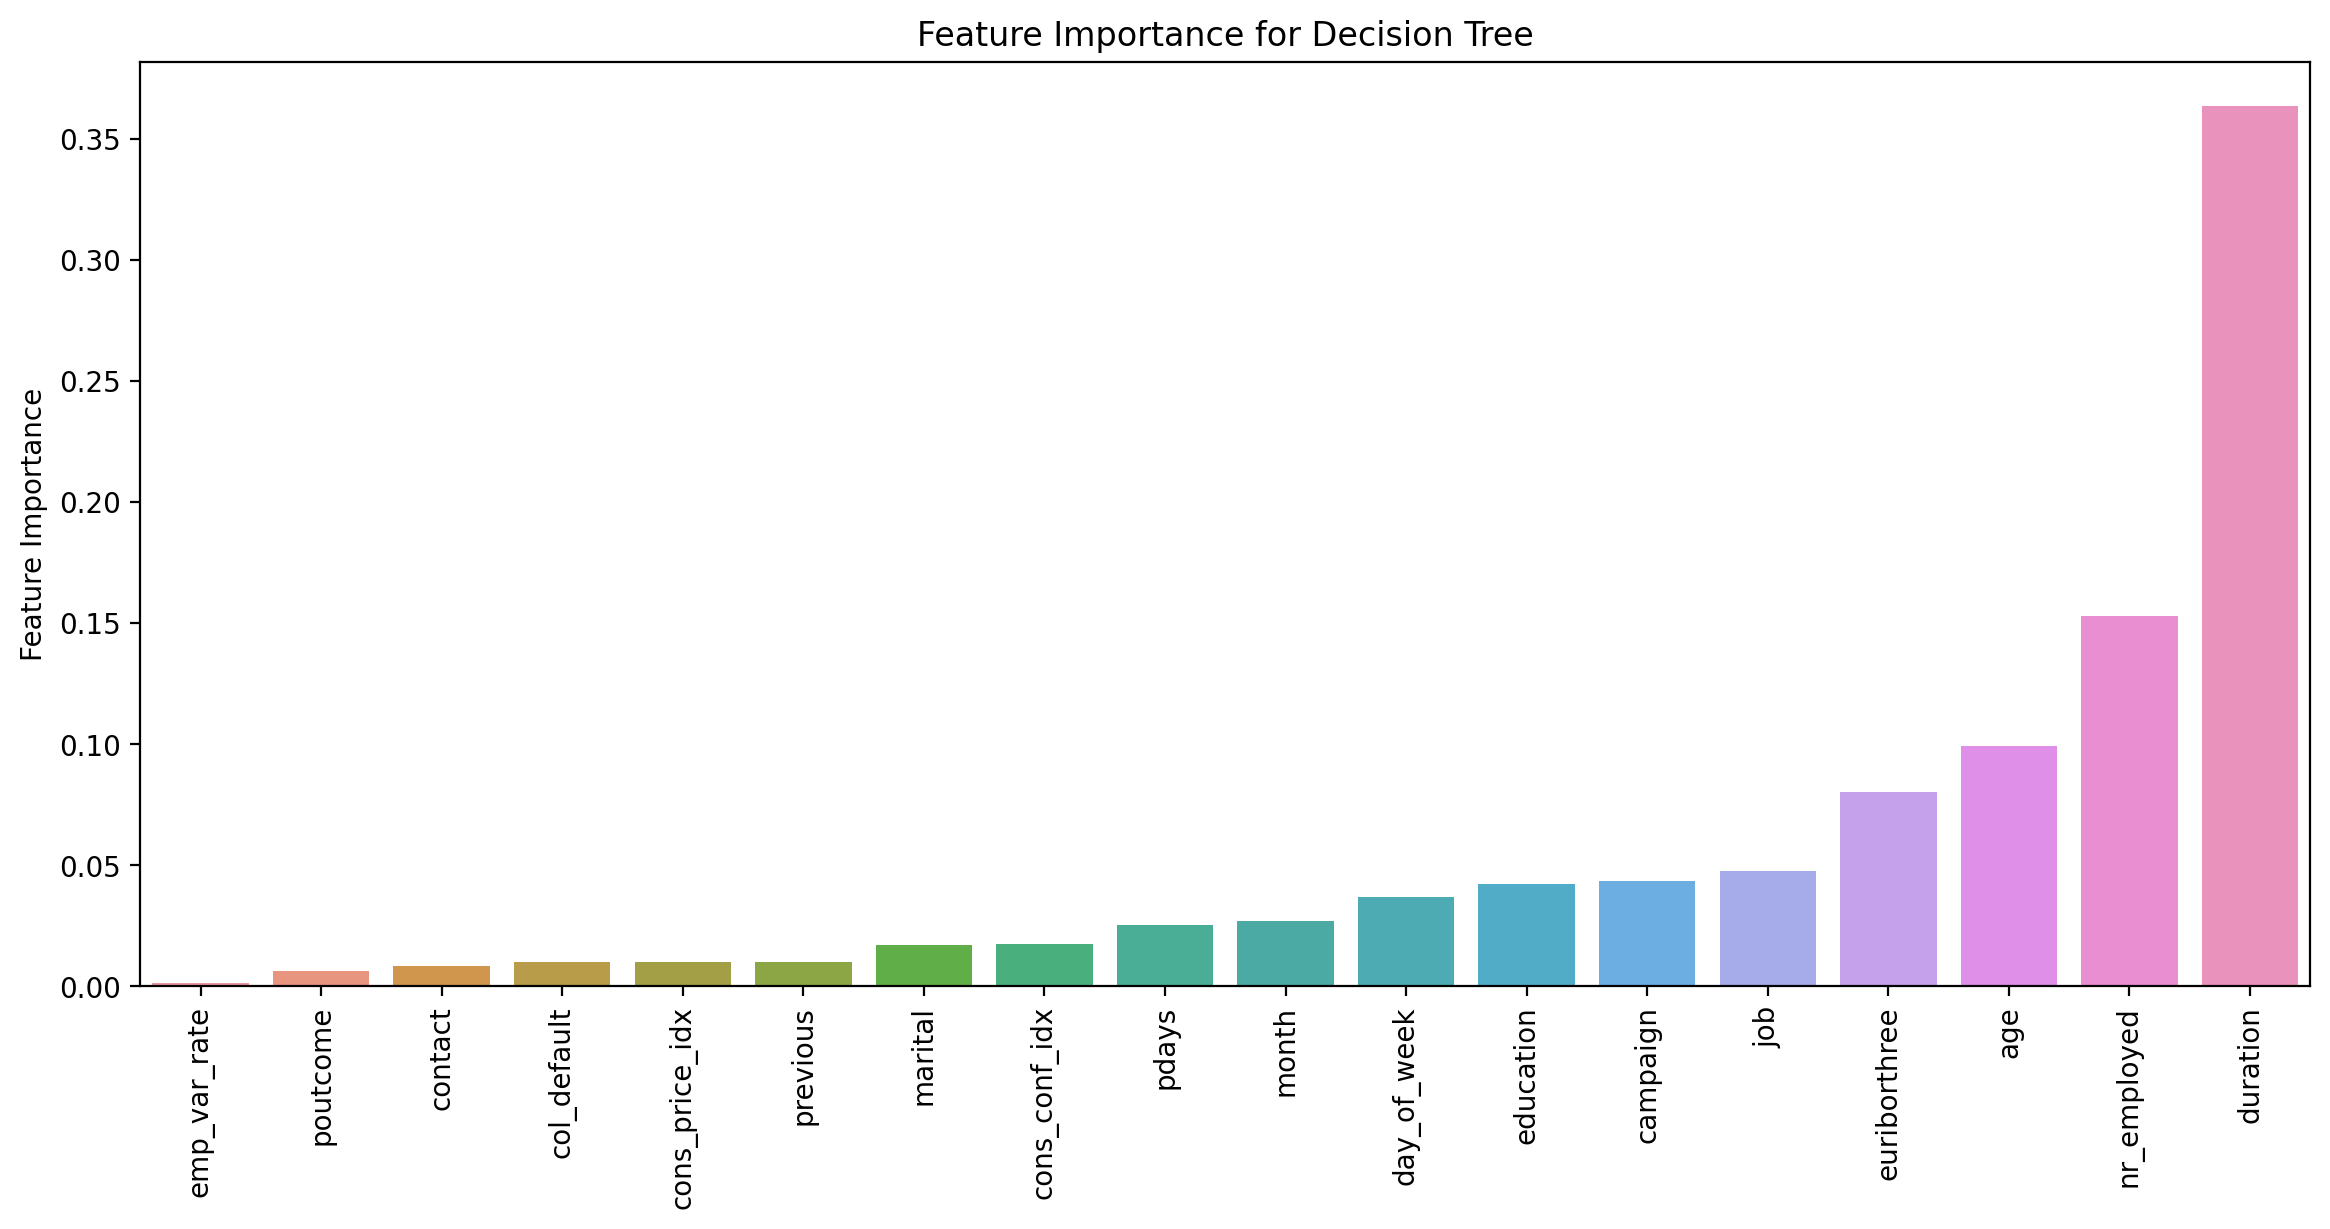

In [76]:
imp_feats = pd.DataFrame(data=dtc.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [77]:
model_results.loc[len(model_results)] = ["Decision Tree Classifier",dtc_accuracy_score,dtc_precision_score,dtc_recall_score,dtc_f1_score]

In [78]:
# model 7 Support Vector Classifier

In [79]:
svc = SVC(random_state = 42)
svc.fit(scaled_X_train, y_train)
svc_preds = svc.predict(scaled_X_test)

In [80]:
svc_accuracy_score = accuracy_score(y_test,svc_preds)
svc_precision_score = precision_score(y_test,svc_preds)
svc_recall_score = recall_score(y_test,svc_preds)
svc_f1_score = f1_score(y_test,svc_preds)

In [81]:
model_results.loc[len(model_results)] = ["Support Vector Classifier",svc_accuracy_score,svc_precision_score,svc_recall_score,svc_f1_score]

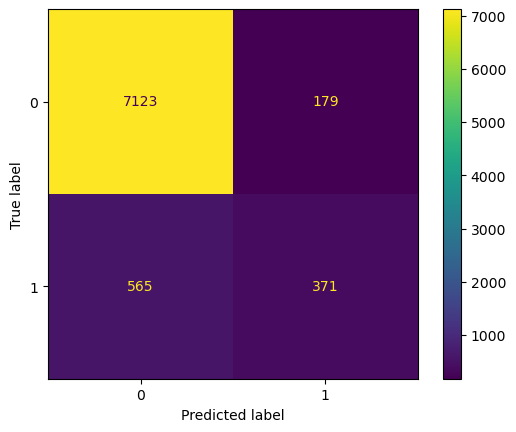

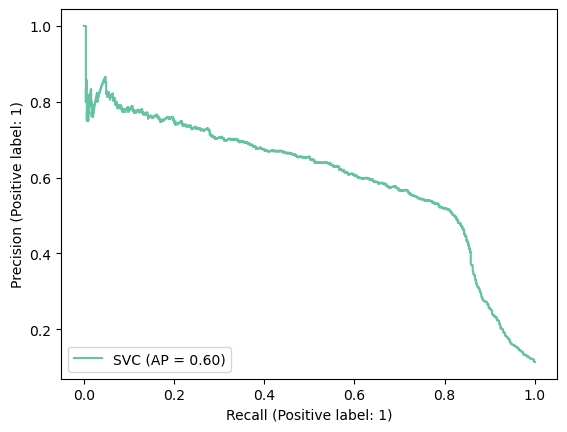

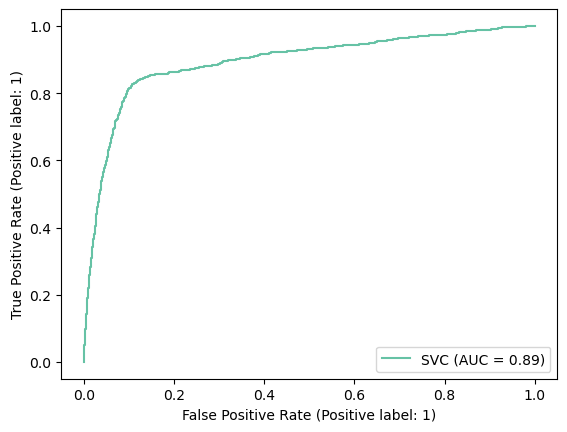

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7302
           1       0.67      0.40      0.50       936

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238



In [82]:
    cm = confusion_matrix(y_test,svc_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svc.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(svc, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(svc, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,svc_preds))

In [83]:
# model 8 ADA Boost

In [84]:
ada = AdaBoostClassifier(random_state = 42)
ada.fit(scaled_X_train, y_train)
ada_preds = ada.predict(scaled_X_test)

In [85]:
ada_accuracy_score = accuracy_score(y_test,ada_preds)
ada_precision_score = precision_score(y_test,ada_preds)
ada_recall_score = recall_score(y_test,ada_preds)
ada_f1_score = f1_score(y_test,ada_preds)

In [86]:
model_results.loc[len(model_results)] = ["ADA Boost Classifier",ada_accuracy_score,ada_precision_score,ada_recall_score,ada_f1_score]

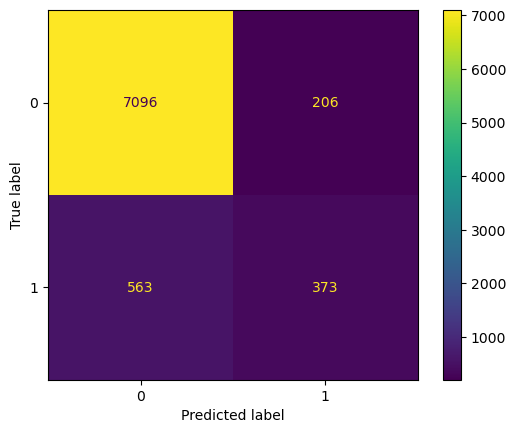

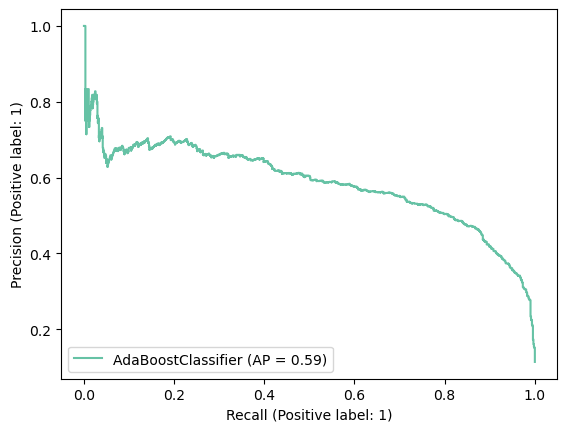

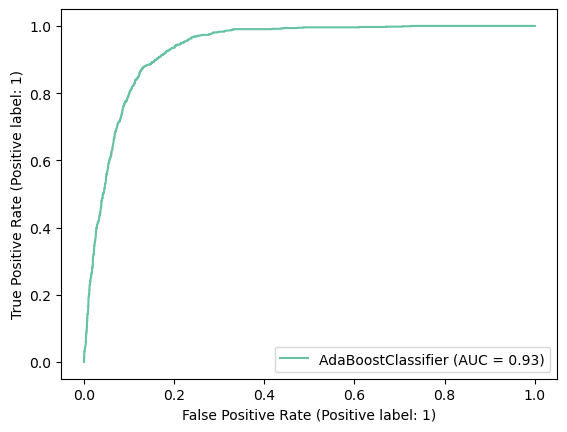

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7302
           1       0.64      0.40      0.49       936

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.72      8238
weighted avg       0.89      0.91      0.90      8238



In [87]:
    cm = confusion_matrix(y_test,ada_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=ada.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(ada, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(ada, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,ada_preds))

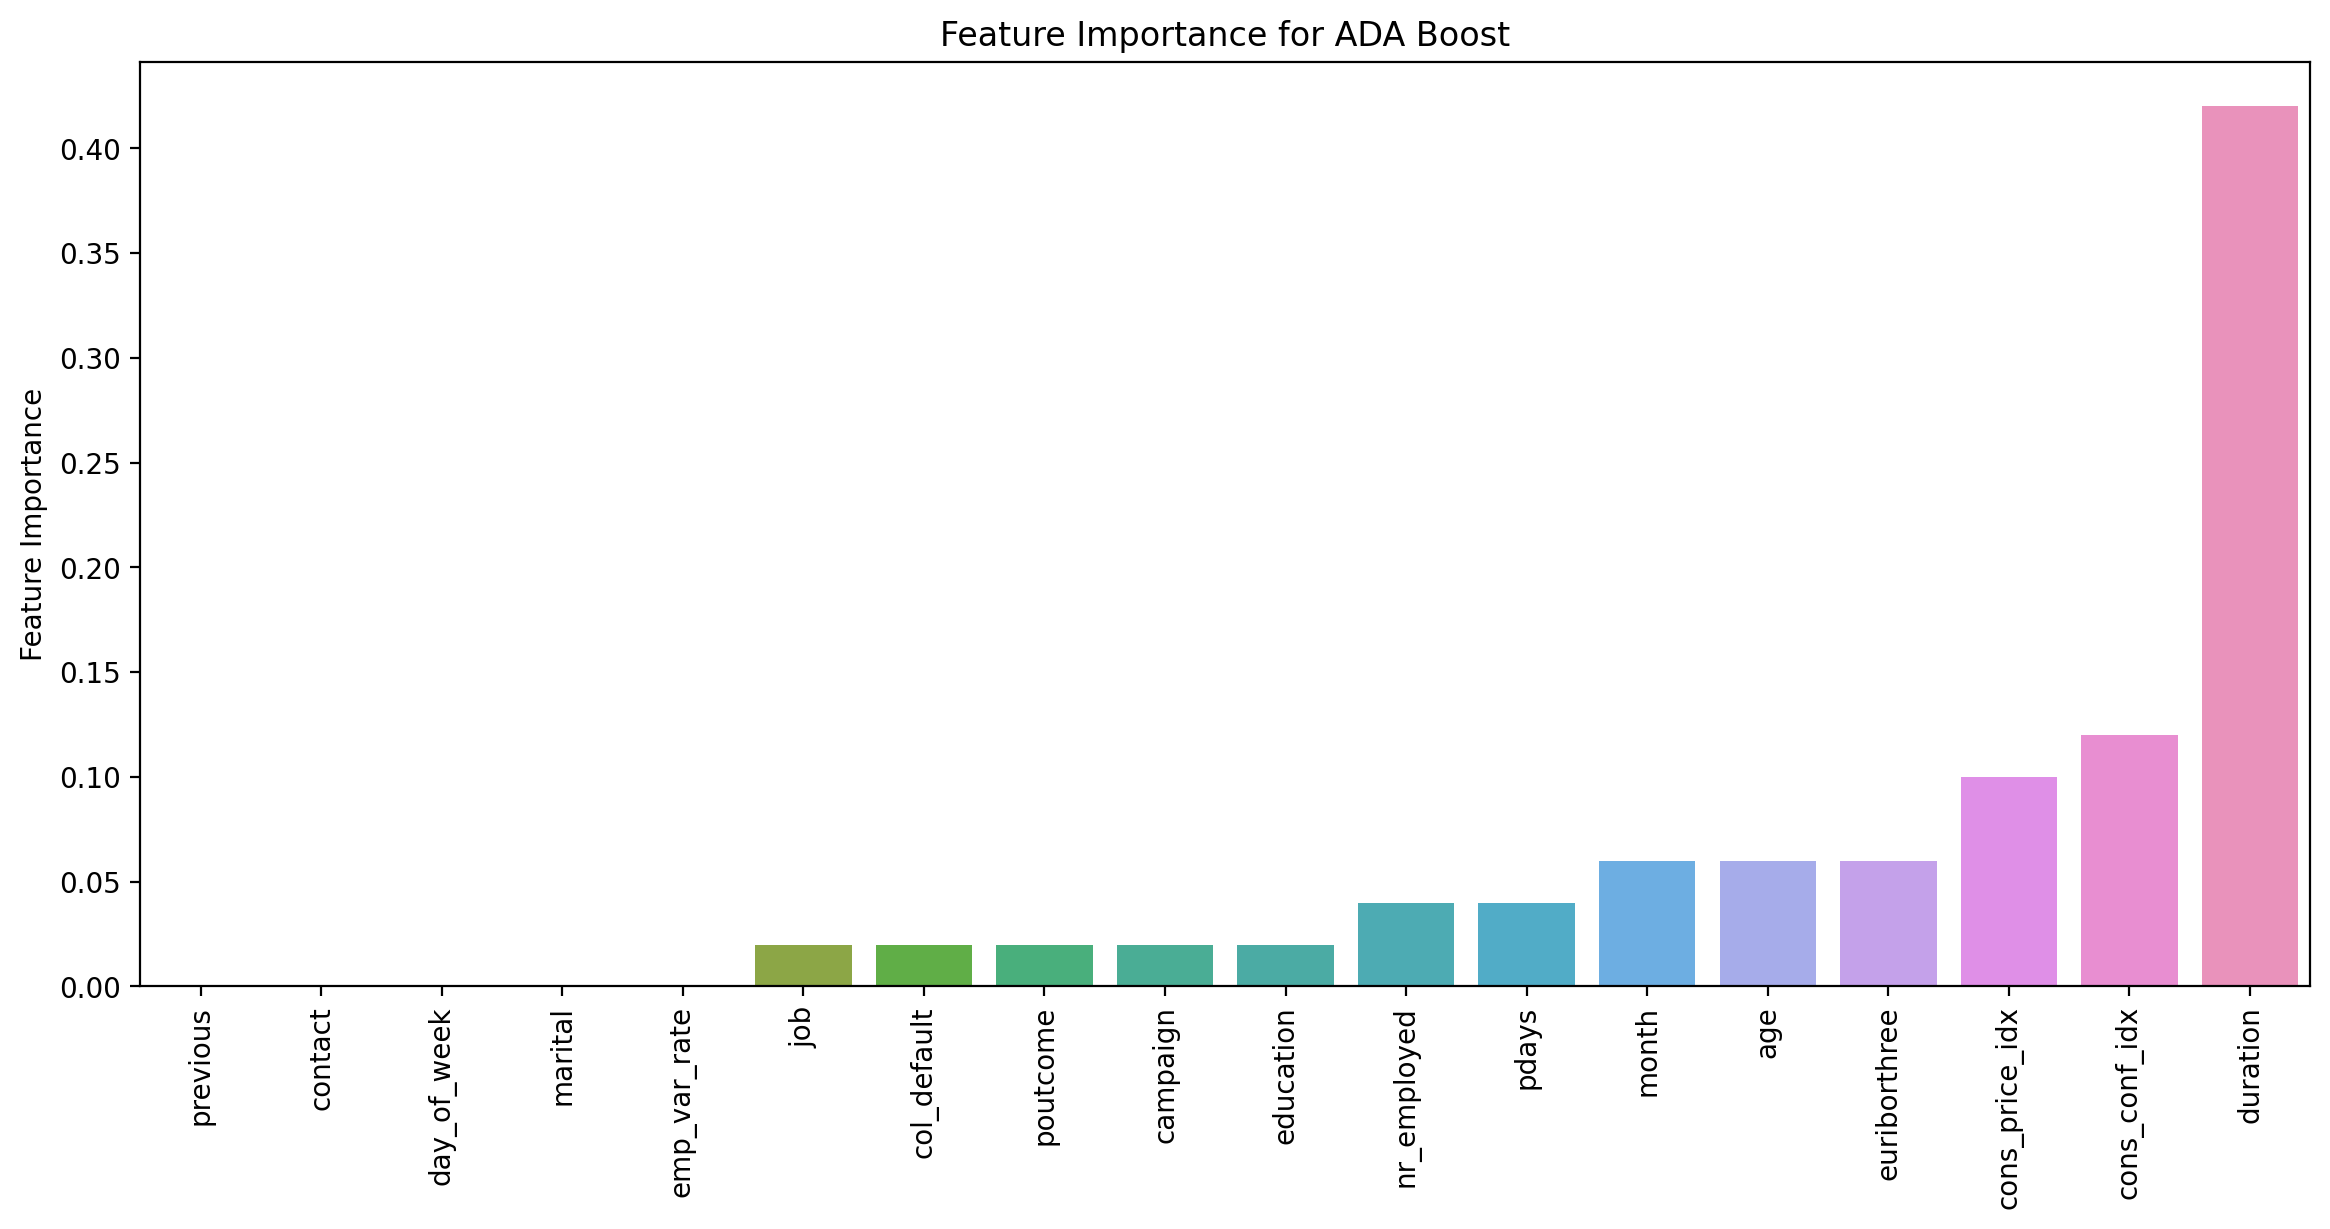

In [88]:
imp_feats = pd.DataFrame(data=ada.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for ADA Boost");

In [ ]:
#Hyperparameter Tunning

In [89]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [90]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(scaled_X_train, y_train)

best_params = rf_random.best_params_
best_params


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [91]:
best_rf = RandomForestClassifier(**best_params, random_state=42)

best_rf.fit(scaled_X_train, y_train)
y_pred_best_rf = best_rf.predict(scaled_X_test)

In [92]:
best_rf_accuracy_score = accuracy_score(y_test,y_pred_best_rf)
best_rf_precision_score = precision_score(y_test,y_pred_best_rf)
best_rf_recall_score = recall_score(y_test,y_pred_best_rf)
best_rf_f1_score = f1_score(y_test,y_pred_best_rf)

In [93]:
model_results.loc[len(model_results)] = ["Random Forest Tunned",best_rf_accuracy_score,best_rf_precision_score,best_rf_recall_score,best_rf_f1_score]

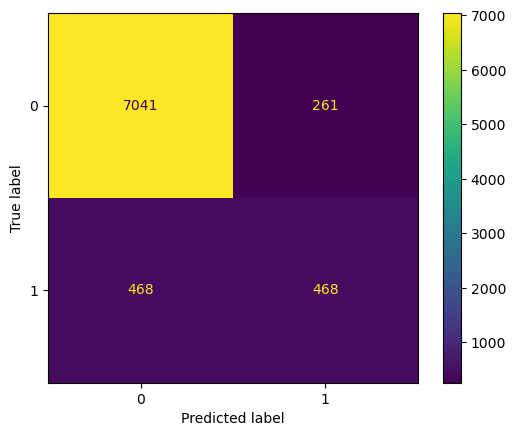

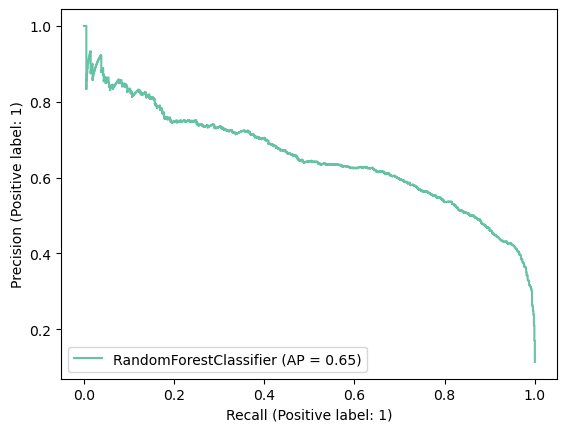

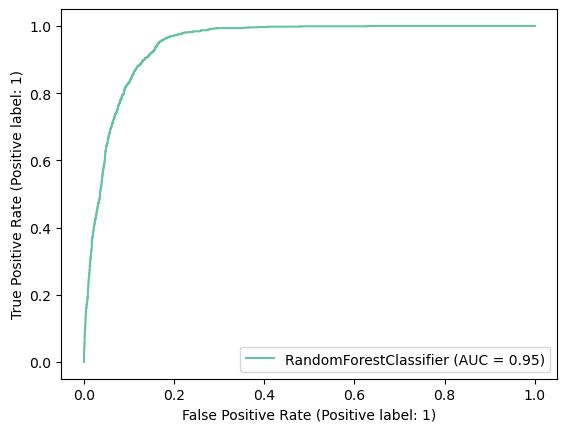

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7302
           1       0.64      0.50      0.56       936

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.76      8238
weighted avg       0.90      0.91      0.91      8238



In [94]:
    cm = confusion_matrix(y_test,y_pred_best_rf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_rf.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(best_rf, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(best_rf, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,y_pred_best_rf))

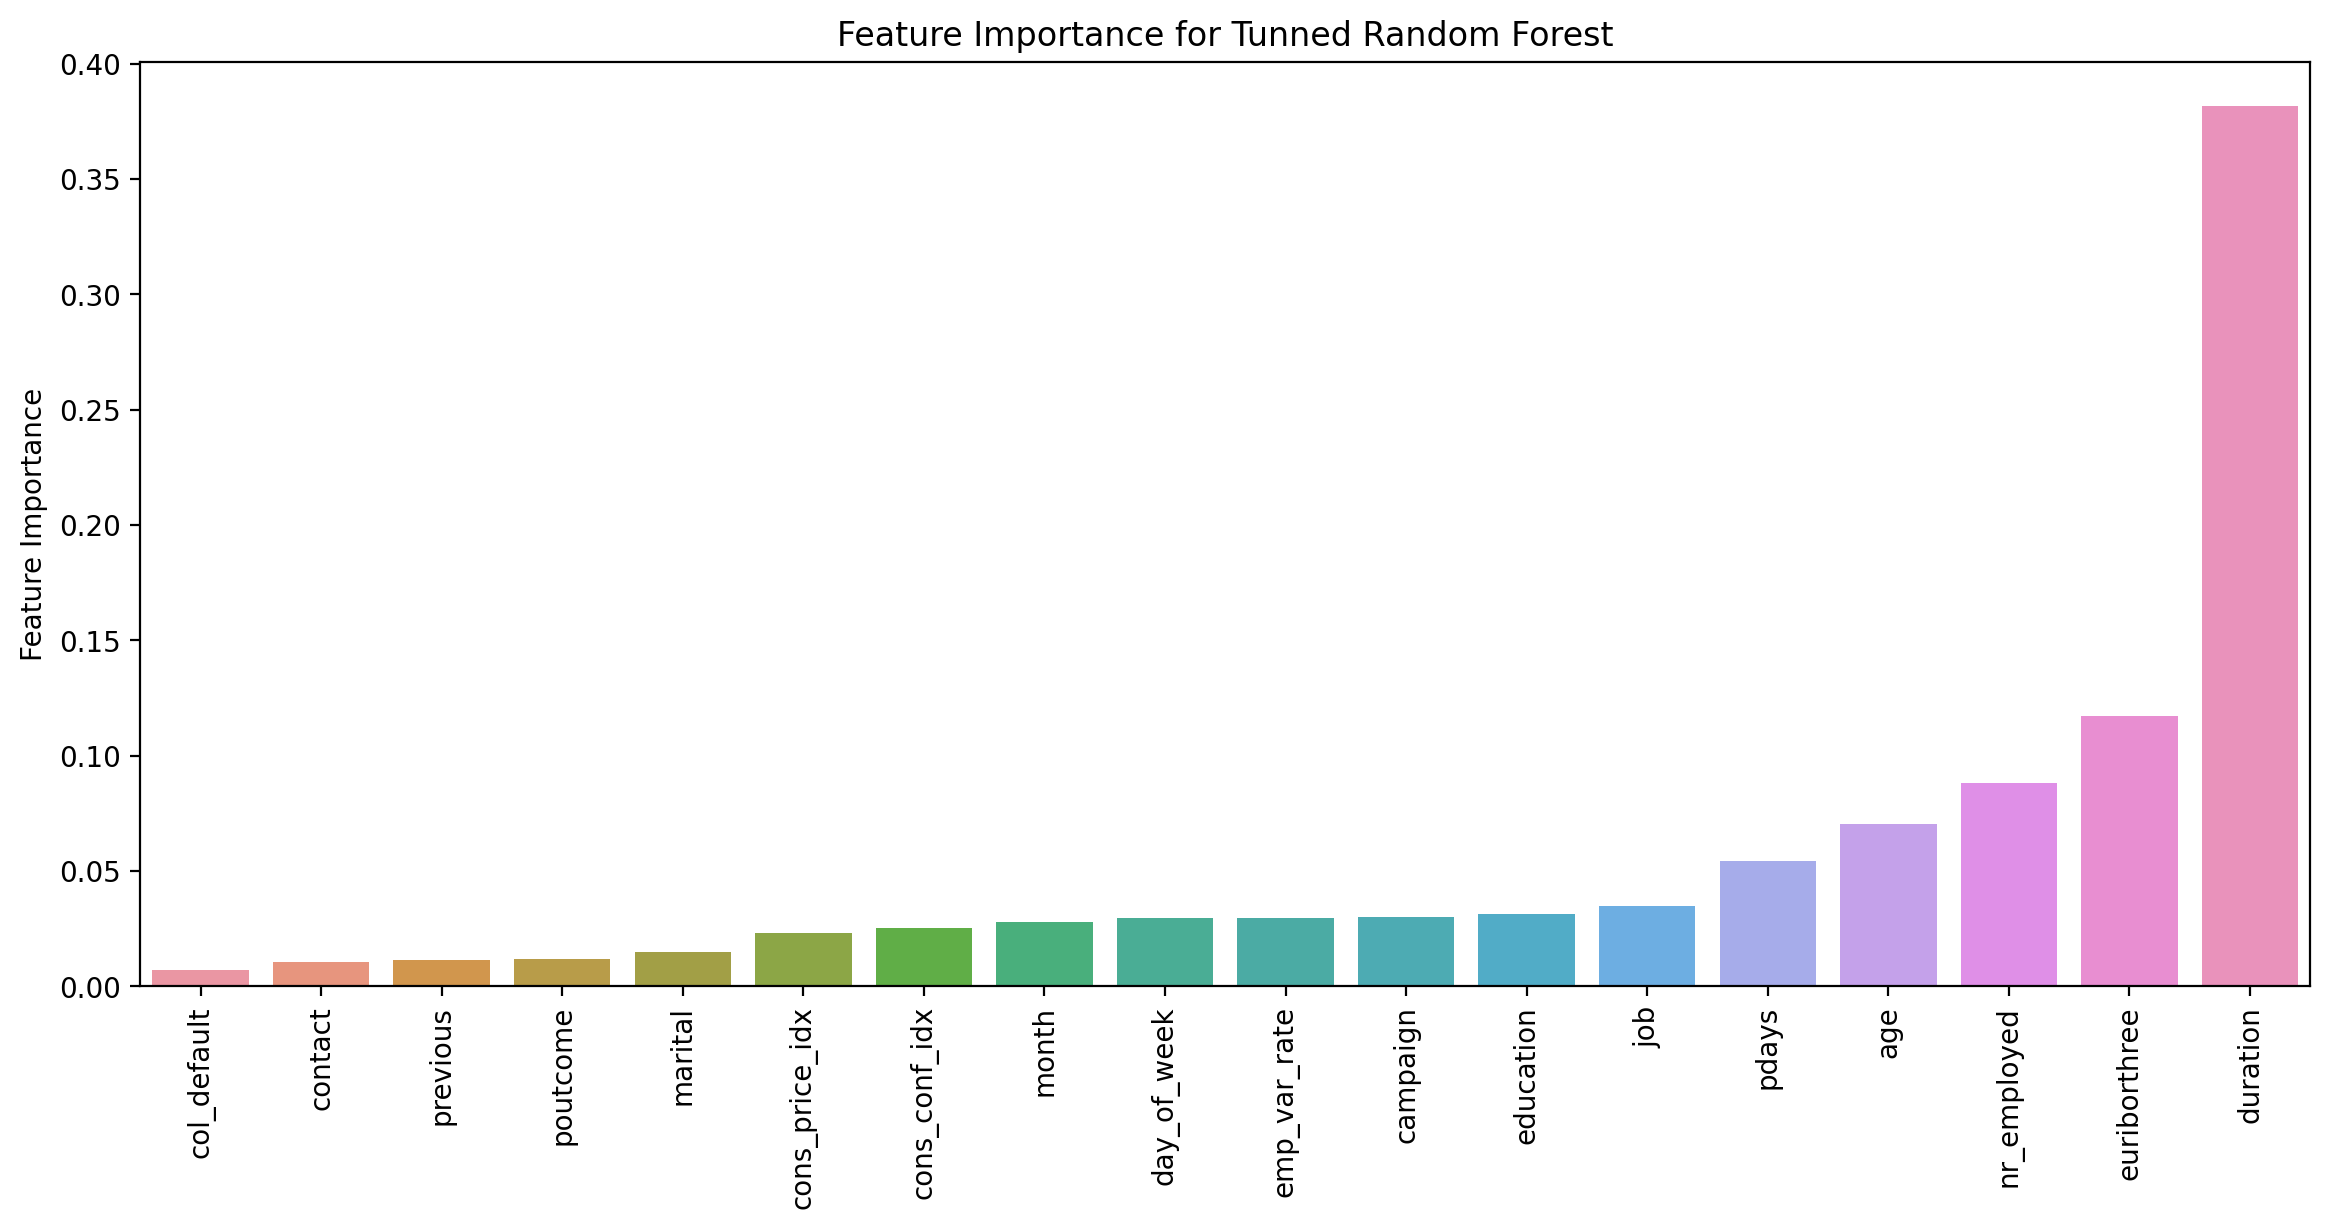

In [95]:
imp_feats = pd.DataFrame(data=best_rf.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Tunned Random Forest");

In [96]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
    
}

xgb_random = RandomizedSearchCV(estimator=xgbc, param_distributions=param_grid_xgb, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

xgb_random.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [97]:
best_params_xgb = xgb_random.best_params_

best_params_xgb

{'subsample': 0.9,
 'n_estimators': 500,
 'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.01,
 'colsample_bytree': 1.0}

In [98]:
best_xgb = xgb.XGBClassifier(**best_params_xgb,random_state=42)

best_xgb.fit(scaled_X_train, y_train)

y_pred_best_xgb = best_xgb.predict(scaled_X_test)


In [99]:
best_xgb_accuracy_score = accuracy_score(y_test,y_pred_best_xgb)
best_xgb_precision_score = precision_score(y_test,y_pred_best_xgb)
best_xgb_recall_score = recall_score(y_test,y_pred_best_xgb)
best_xgb_f1_score = f1_score(y_test,y_pred_best_xgb)

In [100]:
model_results.loc[len(model_results)] = ["XGBoost Tunned",best_xgb_accuracy_score,best_xgb_precision_score,best_xgb_recall_score,best_xgb_f1_score]

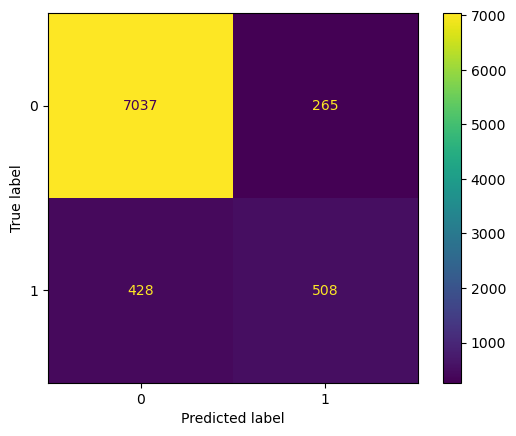

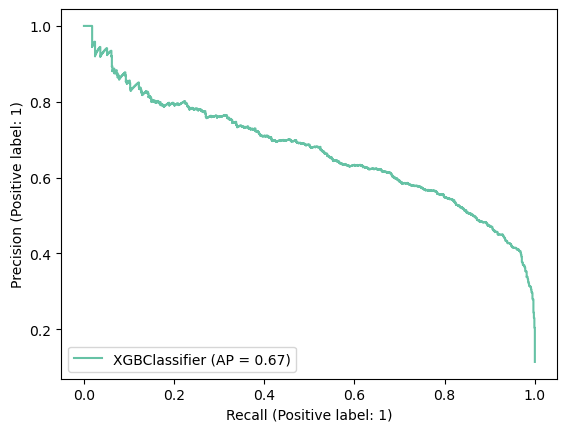

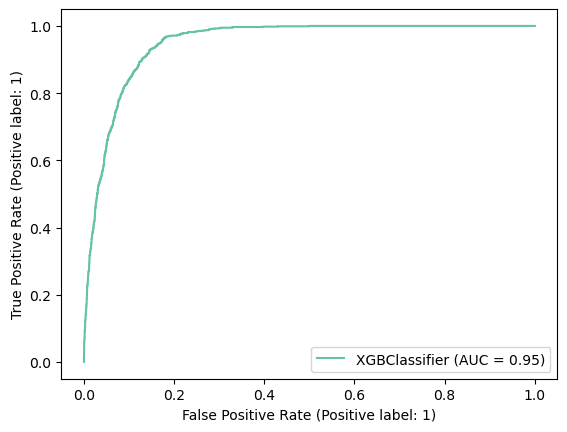

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7302
           1       0.66      0.54      0.59       936

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



In [101]:
    cm = confusion_matrix(y_test,y_pred_best_xgb)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_xgb.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(best_xgb, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(best_xgb, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,y_pred_best_xgb))

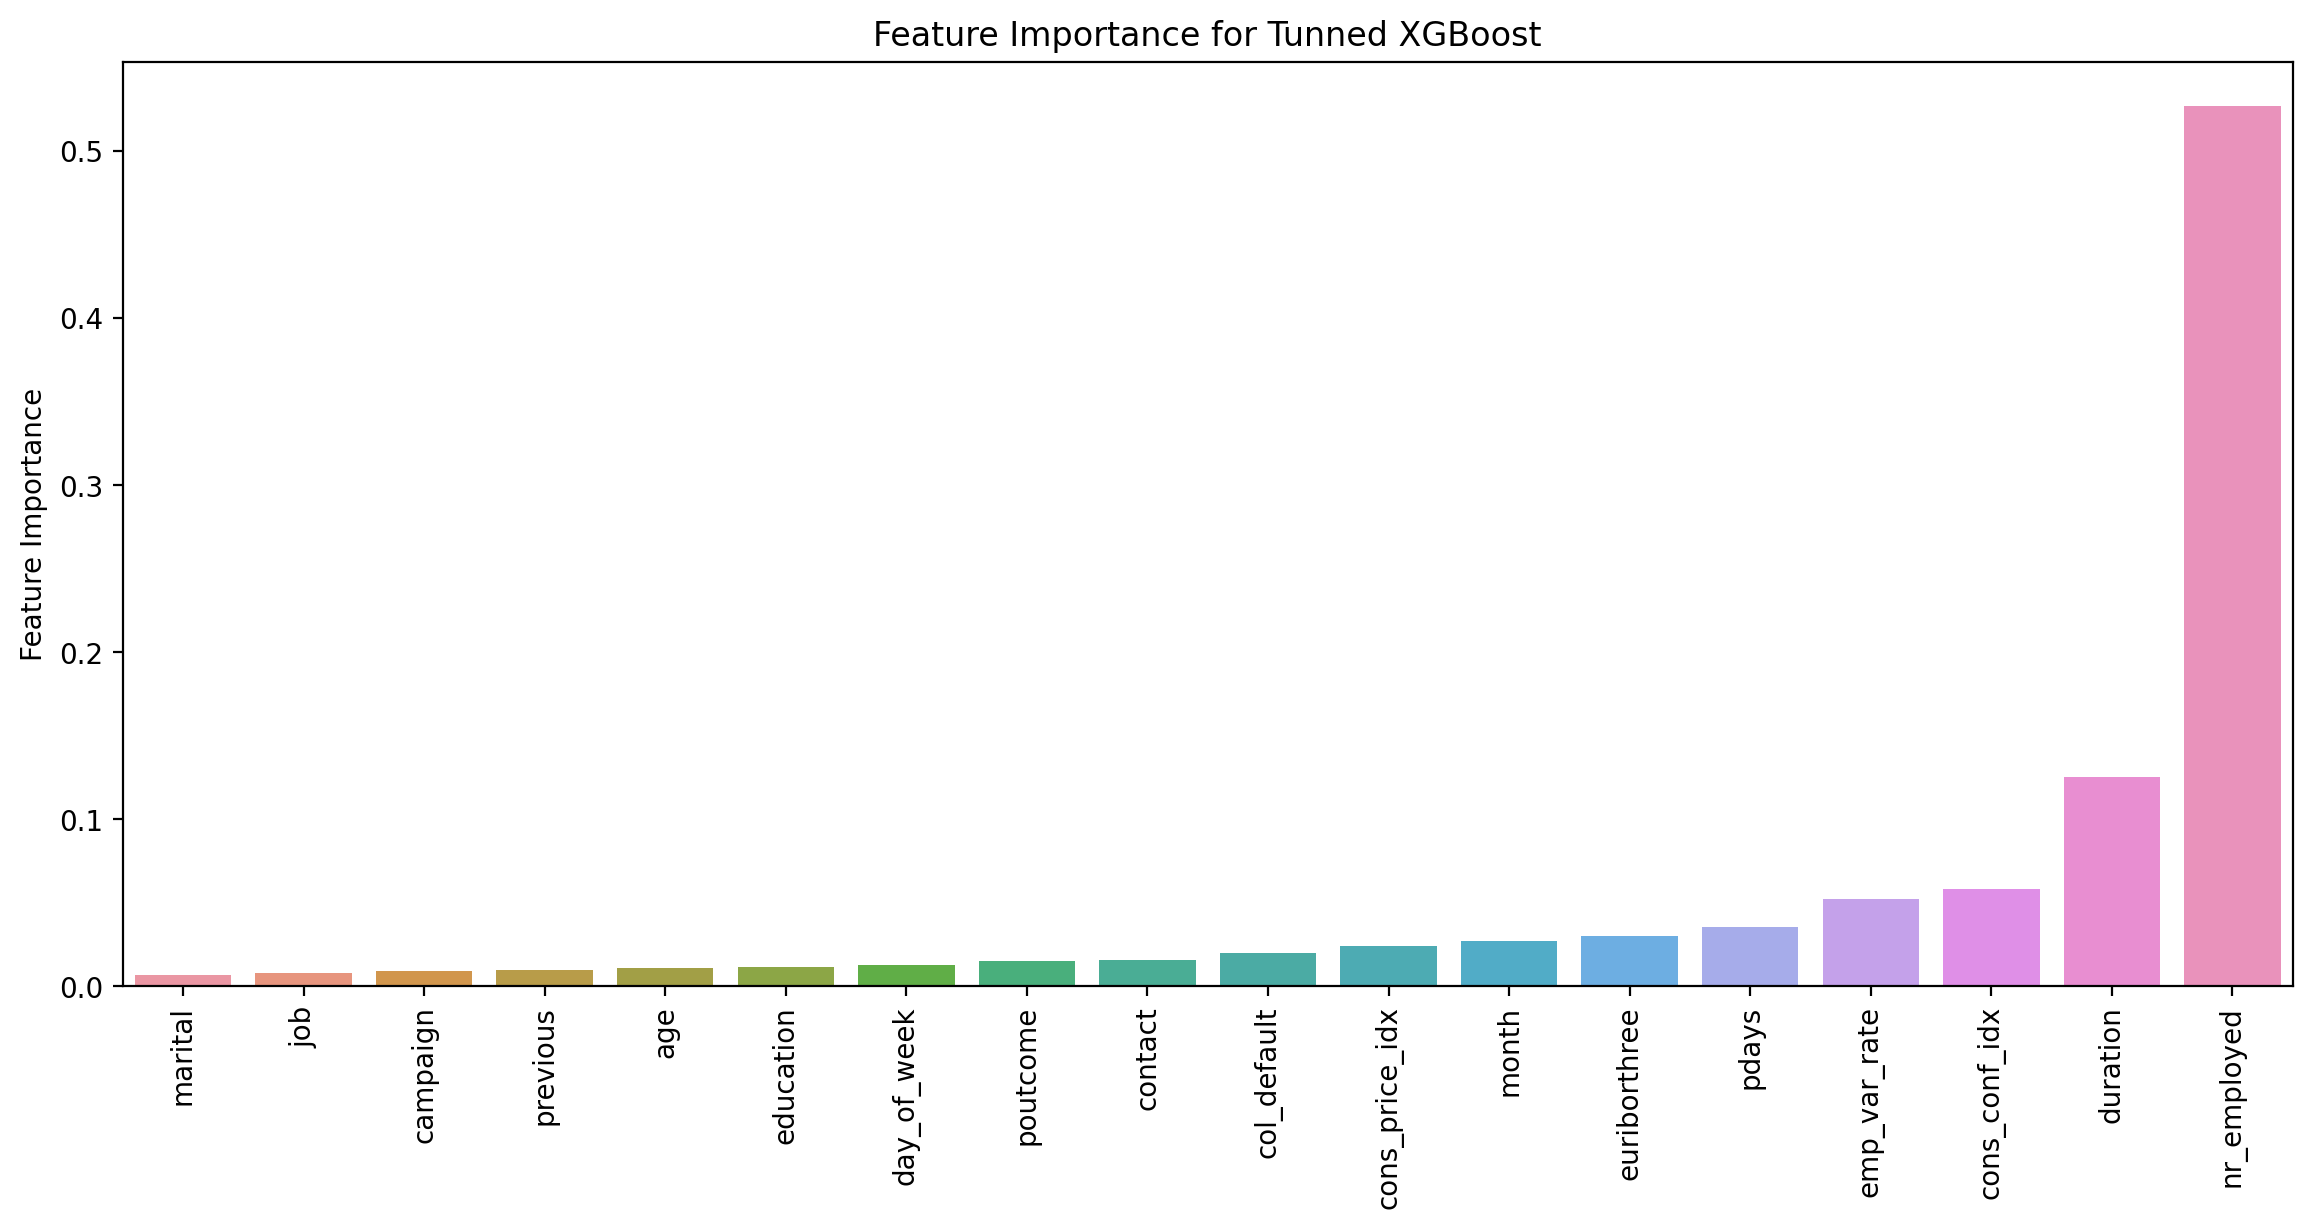

In [102]:
imp_feats = pd.DataFrame(data=best_xgb.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Tunned XGBoost");

In [ ]:
#SMOTE Techniques

In [103]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(scaled_X_train, y_train)

In [104]:
rf_sm =RandomForestClassifier(random_state = 42)
rf_sm.fit(X_sm, y_sm)
rf_sm_preds = rf_sm.predict(scaled_X_test)

In [105]:
rf_sm_accuracy_score = accuracy_score(y_test,rf_sm_preds)
rf_sm_precision_score = precision_score(y_test,rf_sm_preds)
rf_sm_recall_score = recall_score(y_test,rf_sm_preds)
rf_sm_f1_score = f1_score(y_test,rf_sm_preds)

In [106]:
model_results.loc[len(model_results)] = ["Random Forest SMOTE",rf_sm_accuracy_score,rf_sm_precision_score,rf_sm_recall_score,rf_sm_f1_score]

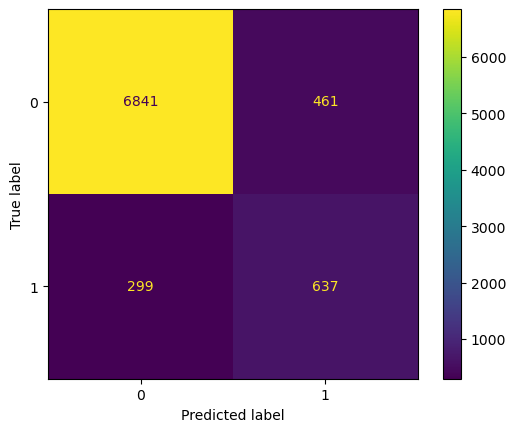

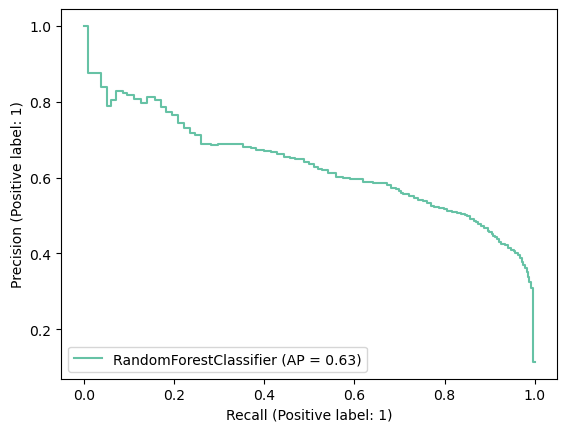

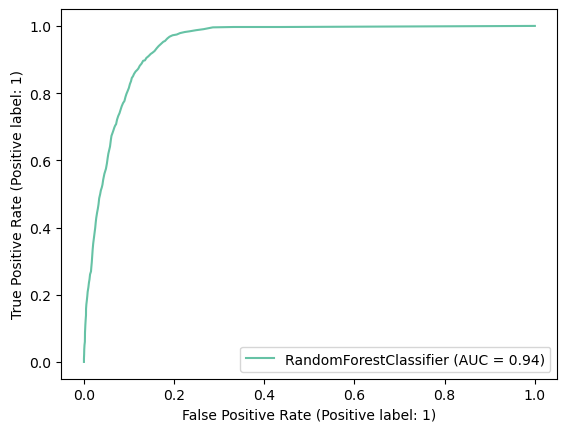

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7302
           1       0.58      0.68      0.63       936

    accuracy                           0.91      8238
   macro avg       0.77      0.81      0.79      8238
weighted avg       0.92      0.91      0.91      8238



In [107]:
    cm = confusion_matrix(y_test,rf_sm_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_sm.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(rf_sm, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(rf_sm, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,rf_sm_preds))

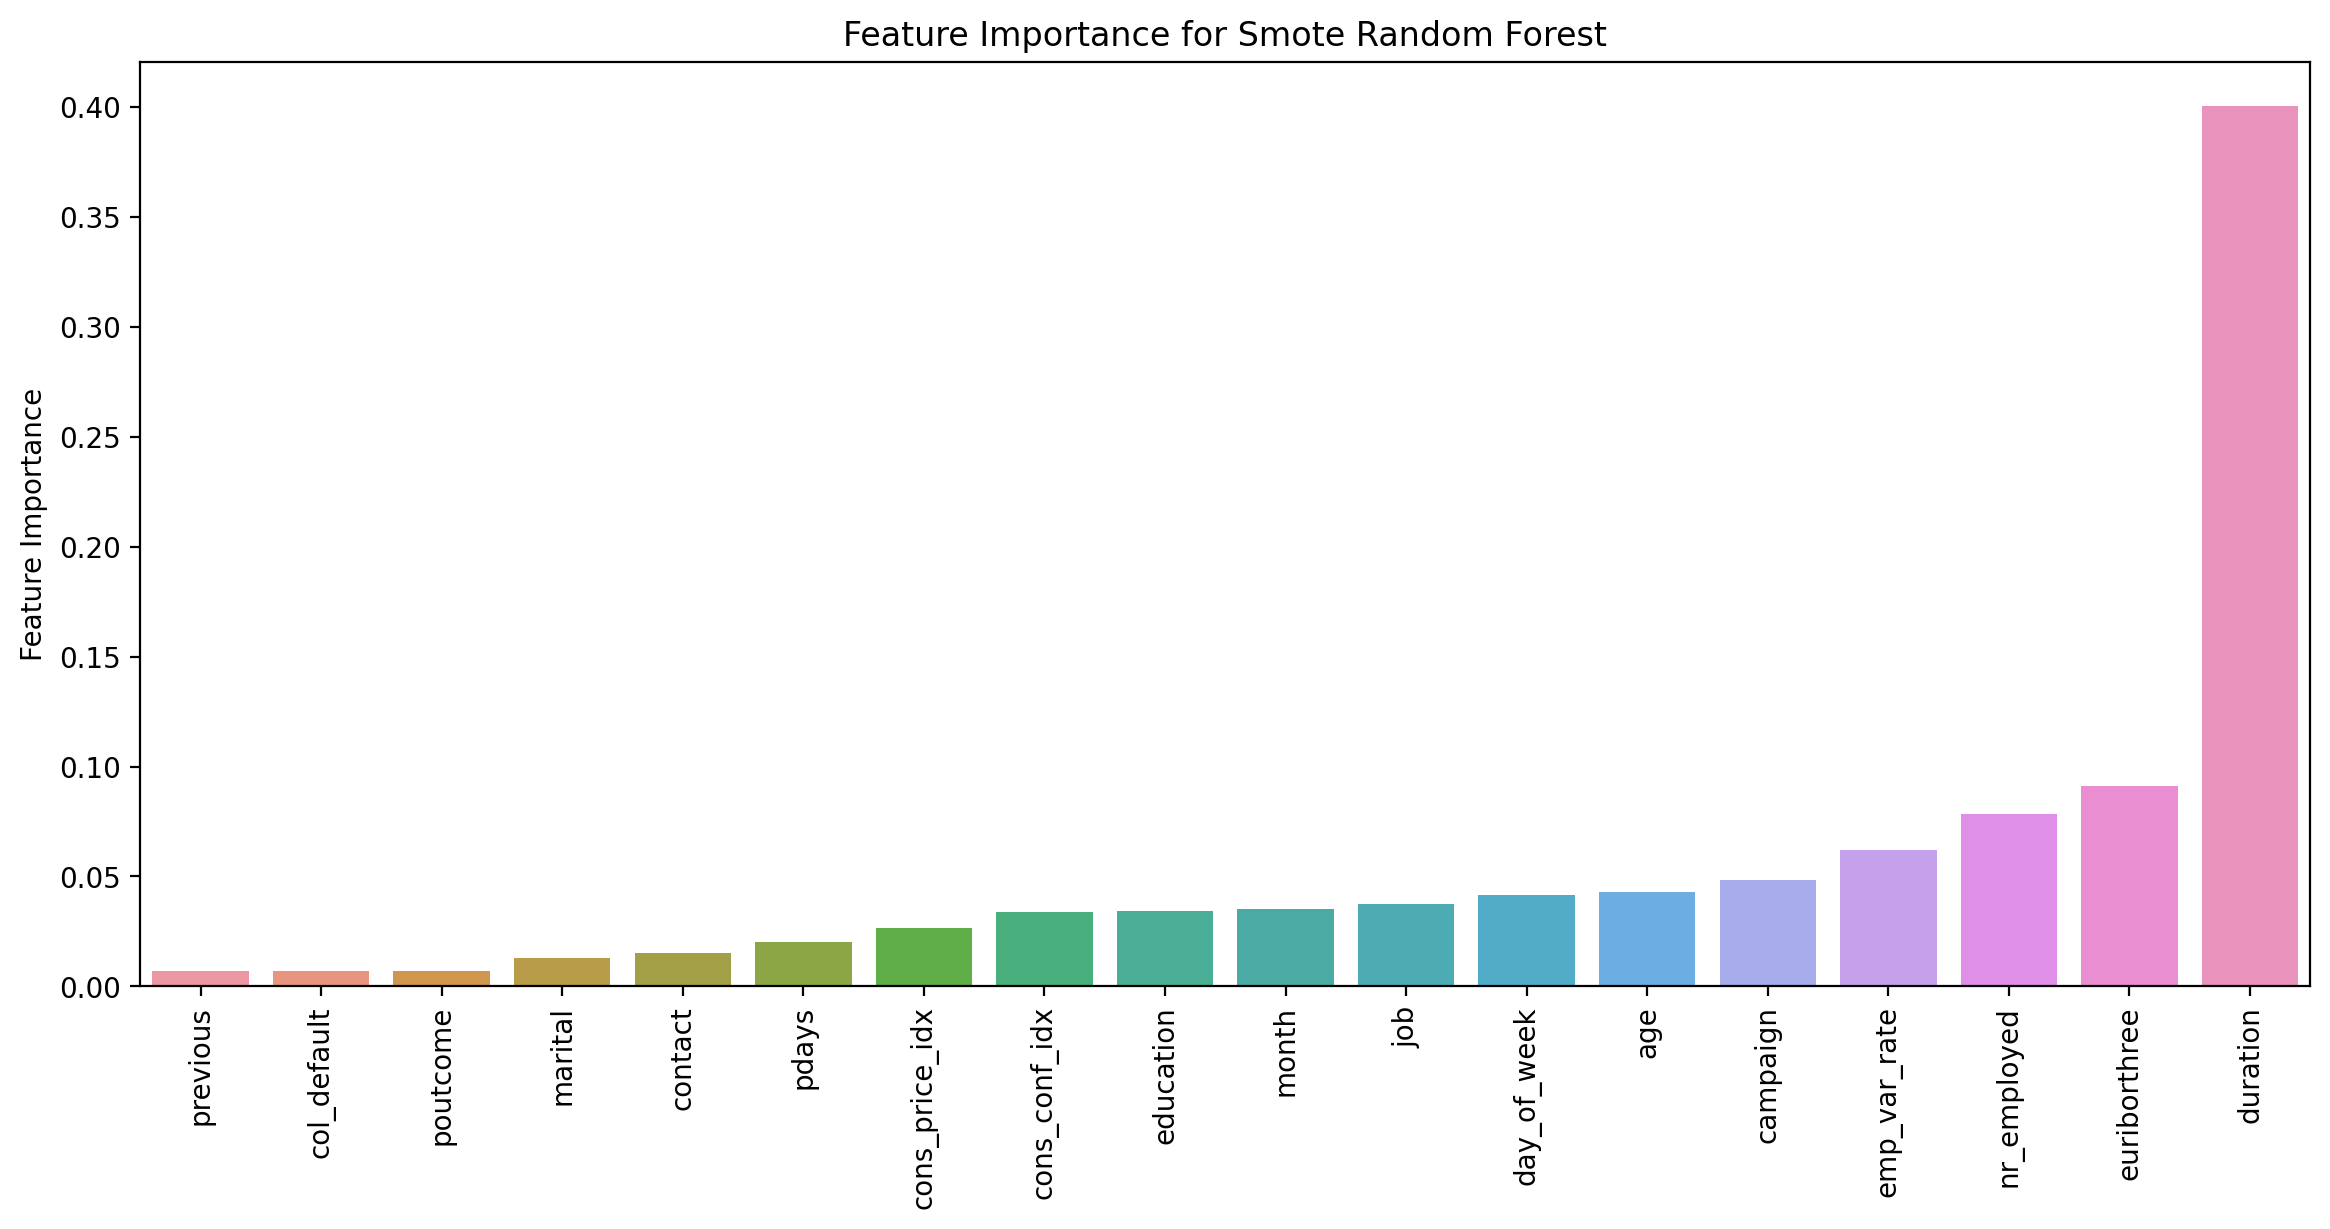

In [108]:
imp_feats = pd.DataFrame(data=rf_sm.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Smote Random Forest");

In [109]:
xgbc_sm = xgb.XGBClassifier()
xgbc_sm.fit(X_sm, y_sm)
xgbc_sm_preds = xgbc_sm.predict(scaled_X_test)

In [110]:
xgbc_sm_accuracy_score = accuracy_score(y_test,xgbc_sm_preds)
xgbc_sm_precision_score = precision_score(y_test,xgbc_sm_preds)
xgbc_sm_recall_score = recall_score(y_test,xgbc_sm_preds)
xgbc_sm_f1_score = f1_score(y_test,xgbc_sm_preds)

In [111]:
model_results.loc[len(model_results)] = ["XGBoost SMOTE",xgbc_sm_accuracy_score,xgbc_sm_precision_score,xgbc_sm_recall_score,xgbc_sm_f1_score]

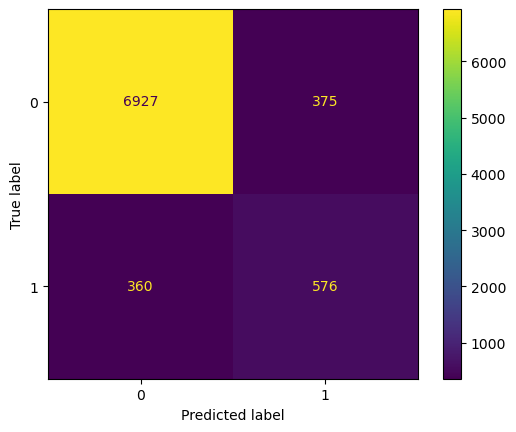

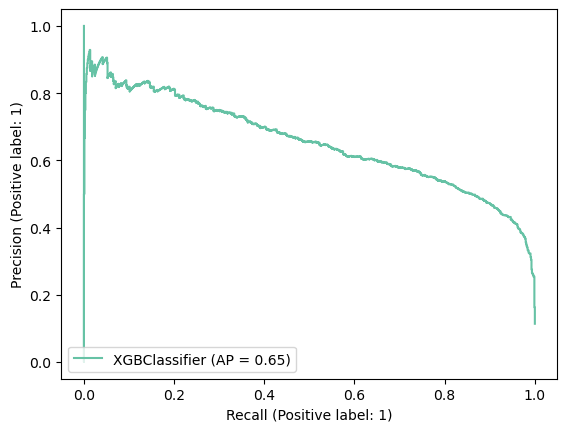

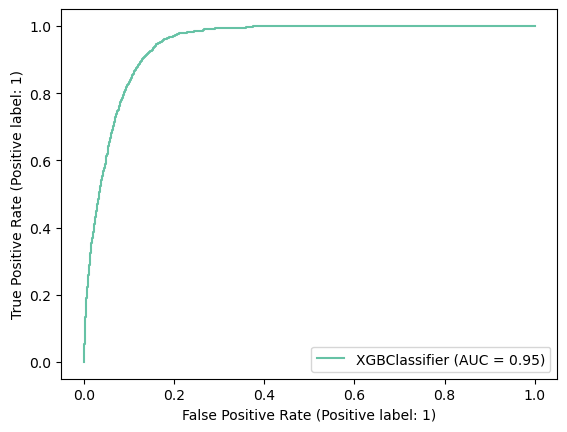

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7302
           1       0.61      0.62      0.61       936

    accuracy                           0.91      8238
   macro avg       0.78      0.78      0.78      8238
weighted avg       0.91      0.91      0.91      8238



In [112]:
    cm = confusion_matrix(y_test,xgbc_sm_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgbc_sm.classes_)
    disp.plot()
    
    
    PrecisionRecallDisplay.from_estimator(xgbc_sm, scaled_X_test, y_test)
    RocCurveDisplay.from_estimator(xgbc_sm, scaled_X_test, y_test)

    plt.show()
    
    print(classification_report(y_test,xgbc_sm_preds))

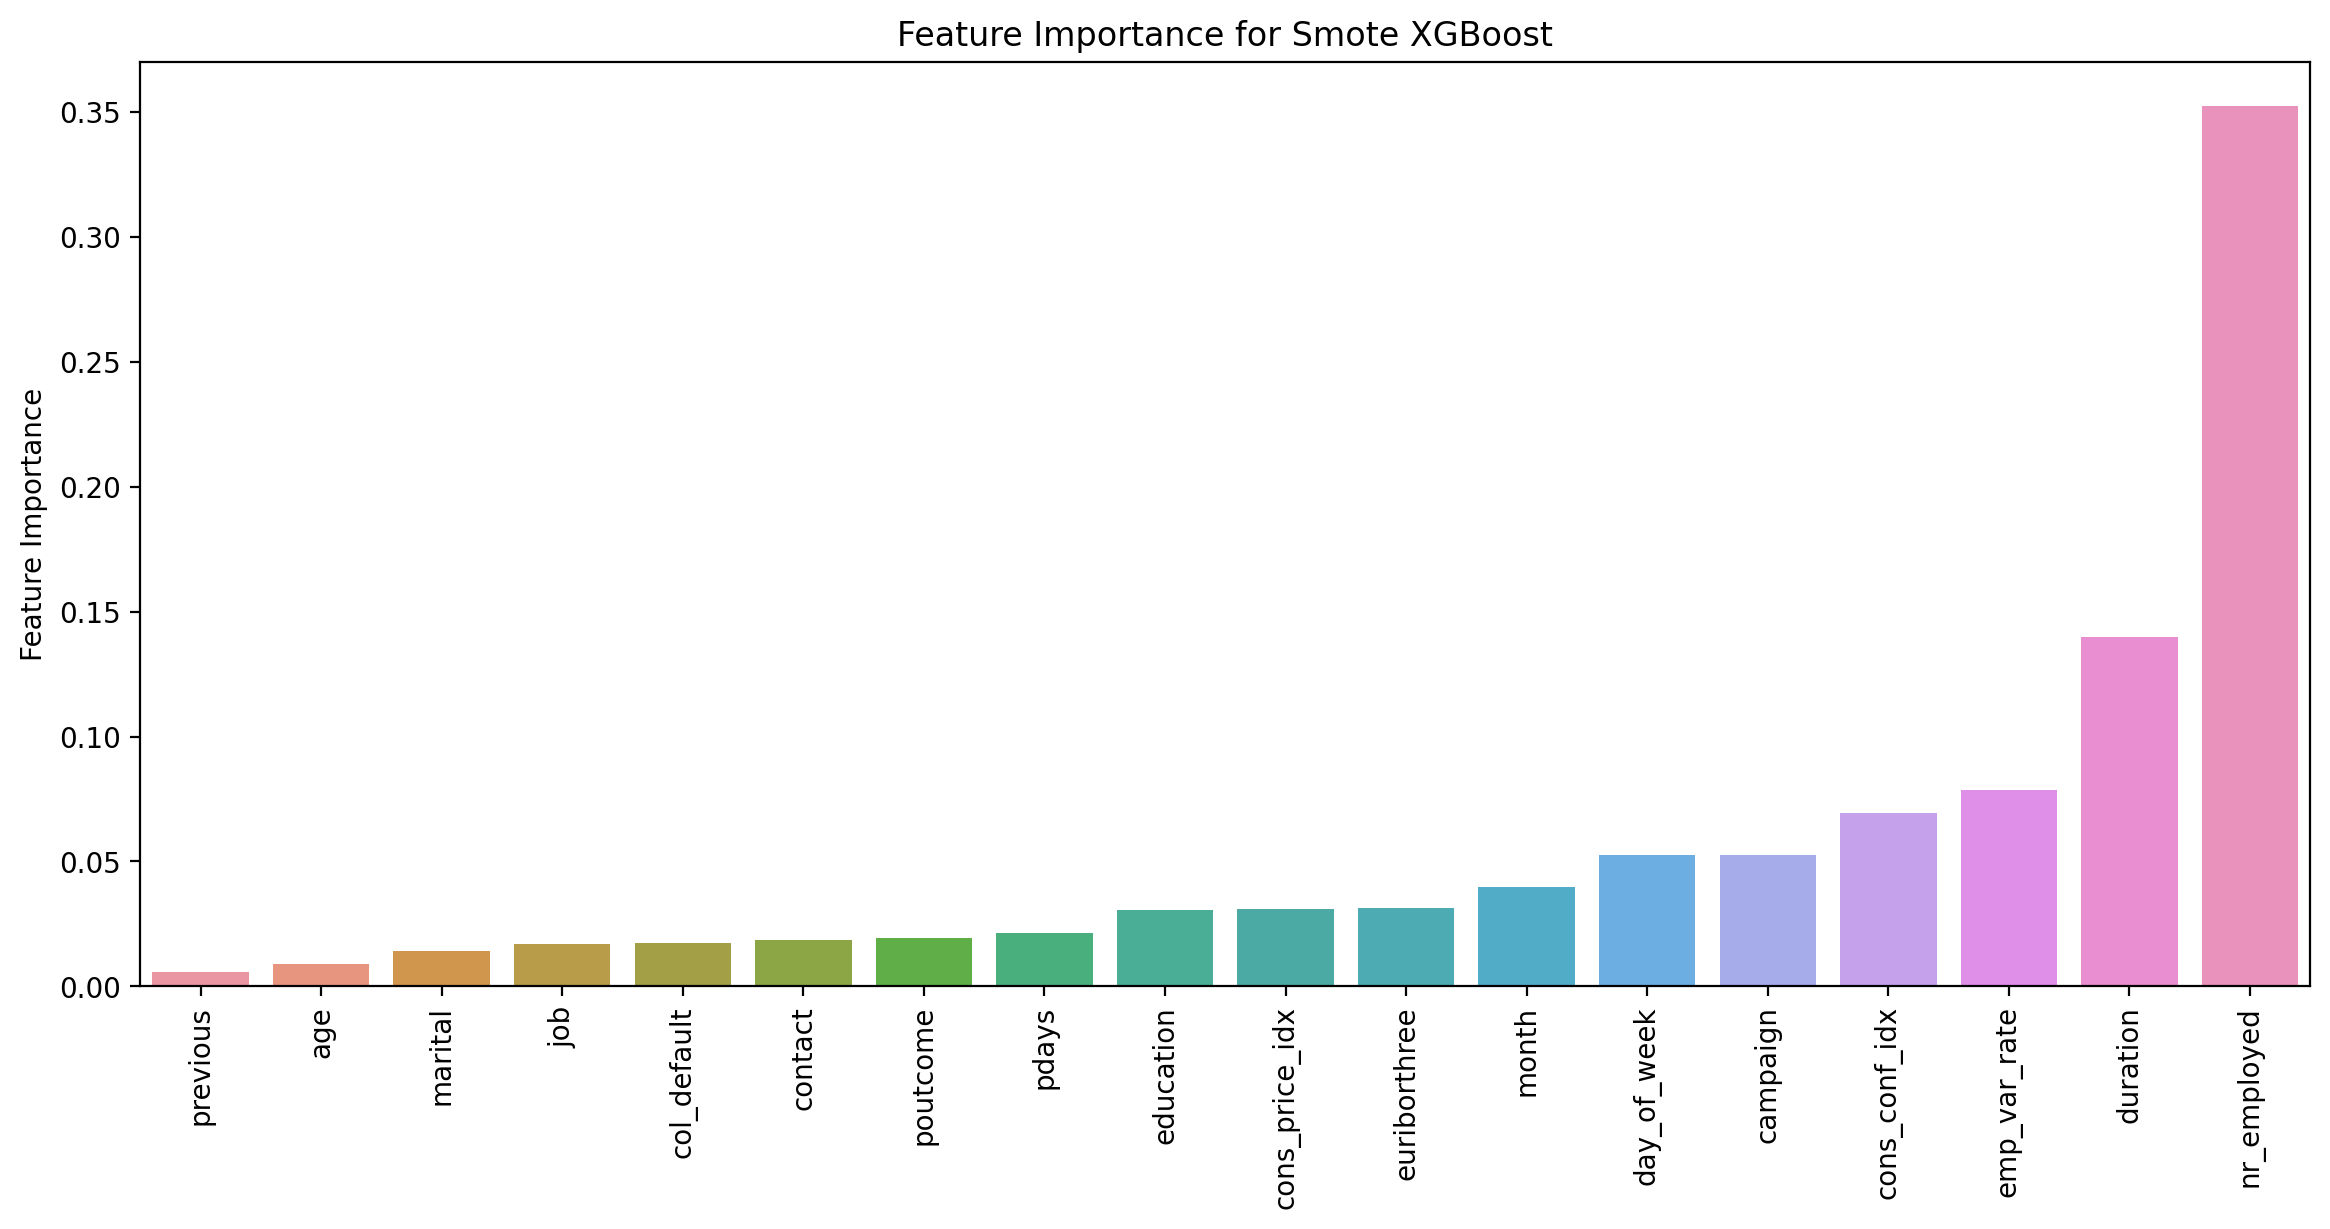

In [113]:
imp_feats = pd.DataFrame(data=xgbc_sm.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Smote XGBoost");

In [114]:
model_results

,Classifier,accuracy,precision,recall,f1
0,Naive Bayes,0.849235,0.398000,0.637821,0.490148
1,Logistic Regression,0.909808,0.663837,0.417735,0.512787
2,Random Forest Classifier,0.910172,0.630319,0.506410,0.561611
3,XGBoost Classifier,0.913450,0.643501,0.534188,0.583771
4,KNN Classifier,0.882617,0.481700,0.435897,0.457656
5,Decision Tree Classifier,0.890993,0.520170,0.523504,0.521832
6,Support Vector Classifier,0.909687,0.674545,0.396368,0.499327
7,ADA Boost Classifier,0.906652,0.644214,0.398504,0.492409
8,Random Forest Tunned,0.911508,0.641975,0.500000,0.562162
9,XGBoost Tunned,0.915878,0.657180,0.542735,0.594500
